

So let's align all of the unmapped reads from each subject in 1000 genomes to a collection of viral references. These did not align to hg19, which is odd being that the homogeneity of the human reference to each viral reference is the hurdle here. A fasta was extracted from each subject's unmapped bam file. This fasta file was aligned to a viral reference. And the coverage depth was extracted from this alignment file for each virus. In addition, the number of reads that aligned in the nonhg19 regions were counted and the ratio of this number and both the total unmapped reads, as well as the total number of sequenced reads for subject. These last 2 numbers are plotted below, grouped by the subject's super population.


```
samtools fasta -N $subjects_unmapped_bam

bowtie2 --all --threads 35 -f --xeq -x virii --very-sensitive -U ${subject}/${subject}.fasta.gz

samtools depth ${subject}/${subject}.virii.bam > ${subject}/${subject}.virii.depth.csv

samtools view -c -F 4 ${subject}/${subject}.virii.bam ${region} > ${f}

```



In [1]:
import pandas
import sqlite3
import matplotlib.pyplot as plt

In [2]:
# For some reason, if this is in the same call as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [3]:
virii=pandas.read_csv('/Users/jakewendt/20181214-1000genomes-unmapped-virii/virii_details.csv', sep="\t", header=None, 
                      names=["accession","description"],
                      index_col=["accession"])
virii.head()

description
accession                                                    
AB513134.1  Human T-lymphotropic virus 1 proviral DNA, com...
AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA,...
AF037218.1     Human herpesvirus 7 strain RK, complete genome
AF148805.2   Human herpesvirus 8 strain GK18, complete genome
AP015015.1  Human herpesvirus 4 DNA, complete genome, stra...

In [4]:
metadata=pandas.read_csv("1000genomes_metadata.csv")
metadata.rename(index=str, columns={"Sample":"subject"},inplace=True)
metadata.head()

subject Population Code           Population Description  Gender  \
0  HG00096             GBR  British in England and Scotland    male   
1  HG00097             GBR  British in England and Scotland  female   
2  HG00098             GBR  British in England and Scotland    male   
3  HG00099             GBR  British in England and Scotland  female   
4  HG00100             GBR  British in England and Scotland  female   

  Super Population Code Super Population Description  
0                   EUR                     European  
1                   EUR                     European  
2                   EUR                     European  
3                   EUR                     European  
4                   EUR                     European

In [5]:
conn = sqlite3.connect("/Users/jakewendt/20190128-1000genomes-unmapped-viruses/unmapped_viral_mapped.sqlite3")
df = pandas.read_sql_query("SELECT * FROM subjects ORDER BY subject", conn)
df.head()

subject  unmapped     mapped      total AB513134_1 AB513134_1_unmapped  \
0  HG00096   2083467  145063589  147147056       None                None   
1  HG00097   1158537  298693620  299852157       None                None   
2  HG00099   1147814  247709161  248856975       None                None   
3  HG00100  13376337  408106230  421482567       None                None   
4  HG00101   1058895  217906779  218965674       None                None   

  AB513134_1_total nonhg19_AB513134_1  nonhg19_AB513134_1_unmapped  \
0             None                  0                          0.0   
1             None                  0                          0.0   
2             None                  0                          0.0   
3             None                  0                          0.0   
4             None                  0                          0.0   

   nonhg19_AB513134_1_total  ... X83413_2_total nonhg19_X83413_2  \
0                       0.0  ...           None              128   
1                       0.0  ...           None              154   
2                       0.0  ...           None              239   
3                       0.0  ...           None             1947   
4                       0.0  ...           None              318   

  nonhg19_X83413_2_unmapped nonhg19_X83413_2_total  Z86099_2  \
0                  0.000061           8.698781e-07      None   
1                  0.000133           5.135864e-07      None   
2                  0.000208           9.603910e-07      None   
3                  0.000146           4.619408e-06      None   
4                  0.000300           1.452282e-06      None   

   Z86099_2_unmapped Z86099_2_total nonhg19_Z86099_2  \
0               None           None                0   
1               None           None                0   
2               None           None                0   
3               None           None                6   
4               None           None                0   

  nonhg19_Z86099_2_unmapped nonhg19_Z86099_2_total  
0              0.000000e+00           0.000000e+00  
1              0.000000e+00           0.000000e+00  
2              0.000000e+00           0.000000e+00  
3              4.485533e-07           1.423546e-08  
4              0.000000e+00           0.000000e+00  

[5 rows x 736 columns]

In [6]:
len(df)

2535

In [7]:
df = df.merge(metadata)
df.head()

subject  unmapped     mapped      total AB513134_1 AB513134_1_unmapped  \
0  HG00096   2083467  145063589  147147056       None                None   
1  HG00097   1158537  298693620  299852157       None                None   
2  HG00099   1147814  247709161  248856975       None                None   
3  HG00100  13376337  408106230  421482567       None                None   
4  HG00101   1058895  217906779  218965674       None                None   

  AB513134_1_total nonhg19_AB513134_1  nonhg19_AB513134_1_unmapped  \
0             None                  0                          0.0   
1             None                  0                          0.0   
2             None                  0                          0.0   
3             None                  0                          0.0   
4             None                  0                          0.0   

   nonhg19_AB513134_1_total  ... Z86099_2_unmapped Z86099_2_total  \
0                       0.0  ...              None           None   
1                       0.0  ...              None           None   
2                       0.0  ...              None           None   
3                       0.0  ...              None           None   
4                       0.0  ...              None           None   

  nonhg19_Z86099_2 nonhg19_Z86099_2_unmapped  nonhg19_Z86099_2_total  \
0                0              0.000000e+00            0.000000e+00   
1                0              0.000000e+00            0.000000e+00   
2                0              0.000000e+00            0.000000e+00   
3                6              4.485533e-07            1.423546e-08   
4                0              0.000000e+00            0.000000e+00   

   Population Code           Population Description  Gender  \
0              GBR  British in England and Scotland    male   
1              GBR  British in England and Scotland  female   
2              GBR  British in England and Scotland  female   
3              GBR  British in England and Scotland  female   
4              GBR  British in England and Scotland    male   

  Super Population Code Super Population Description  
0                   EUR                     European  
1                   EUR                     European  
2                   EUR                     European  
3                   EUR                     European  
4                   EUR                     European  

[5 rows x 741 columns]

In [8]:
max = df['total'].astype(int).max()
print(max)

1389885009


In [9]:
print(1/max)

7.194839814262649e-10


AB513134.1  Human T-lymphotropic virus 1 proviral DNA, complete genome, isolate: B1033-2009


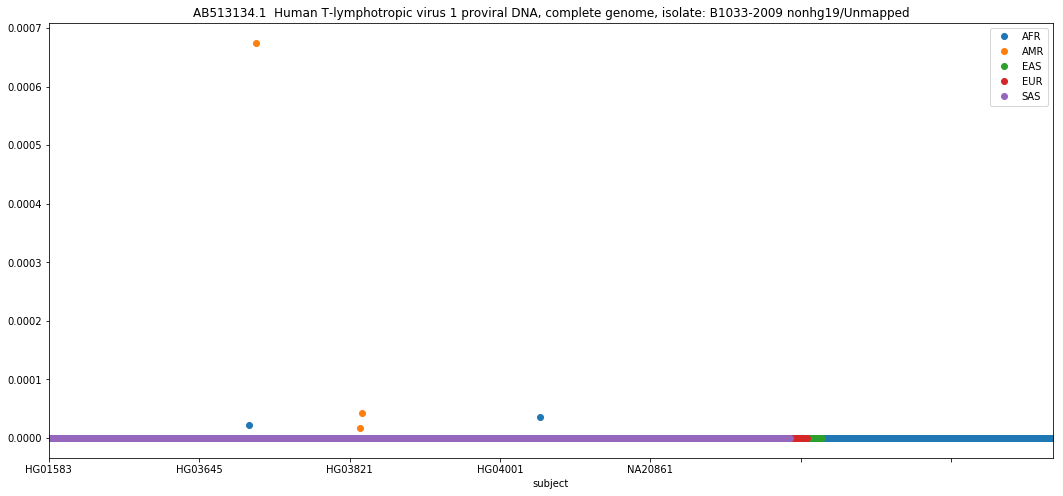

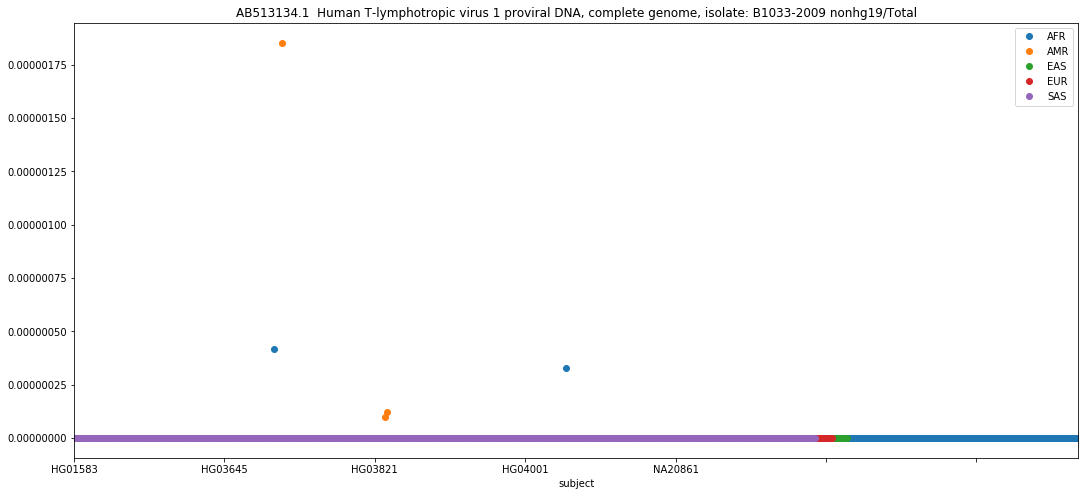

AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome


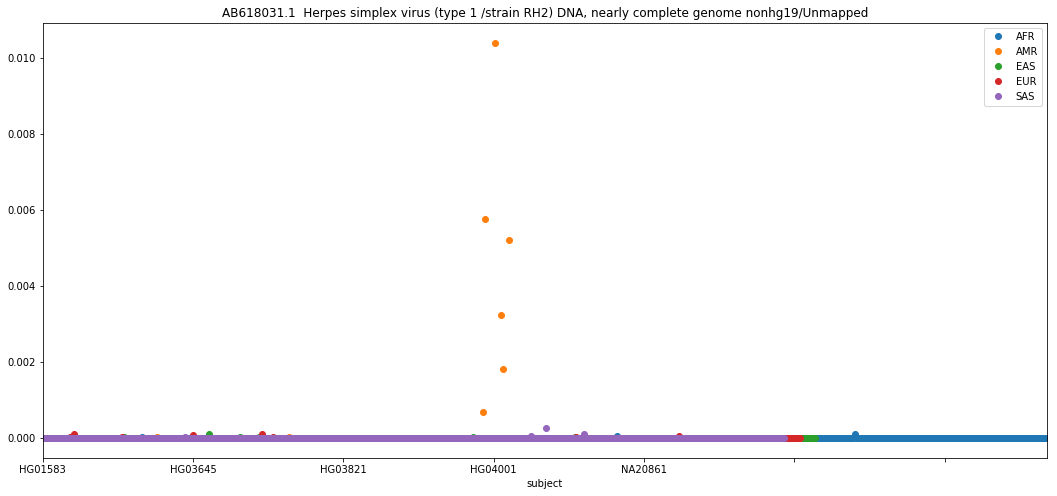

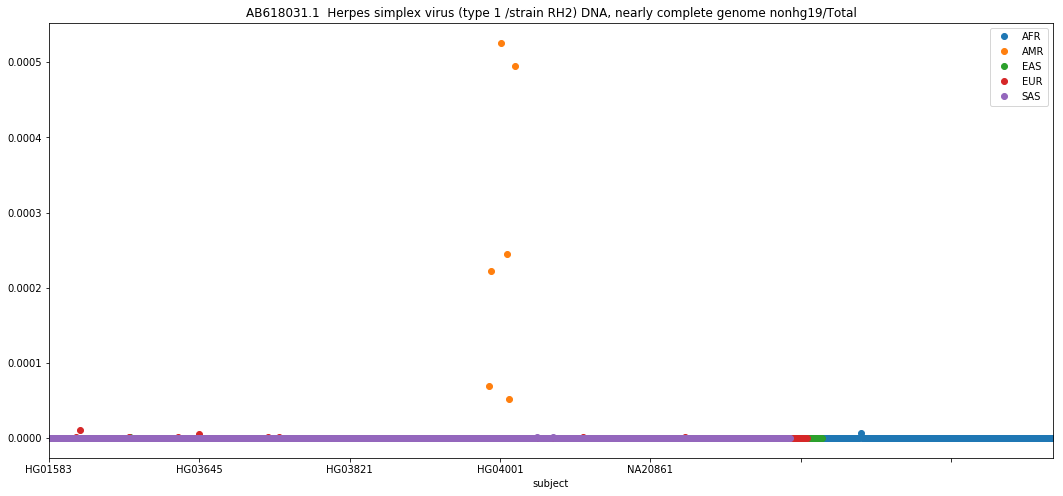

AF037218.1  Human herpesvirus 7 strain RK, complete genome


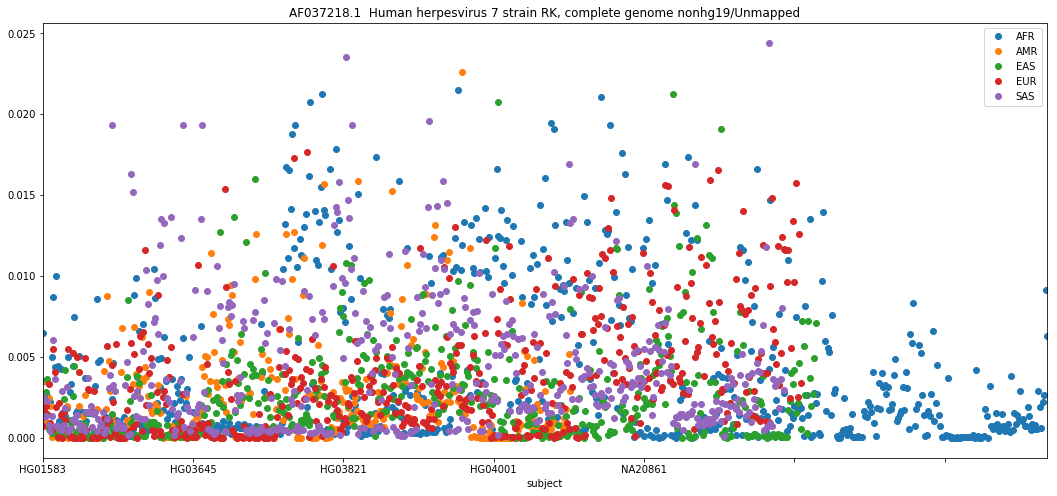

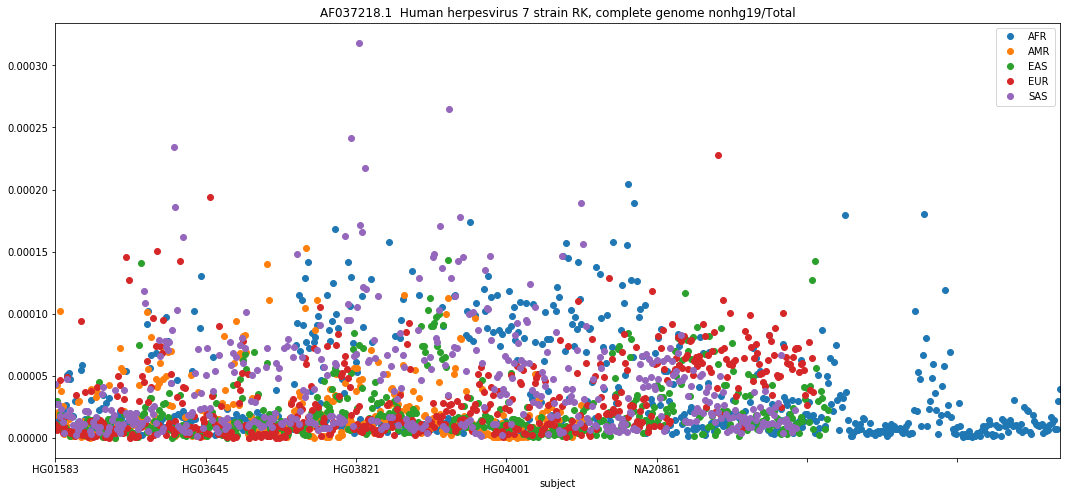

AF148805.2  Human herpesvirus 8 strain GK18, complete genome


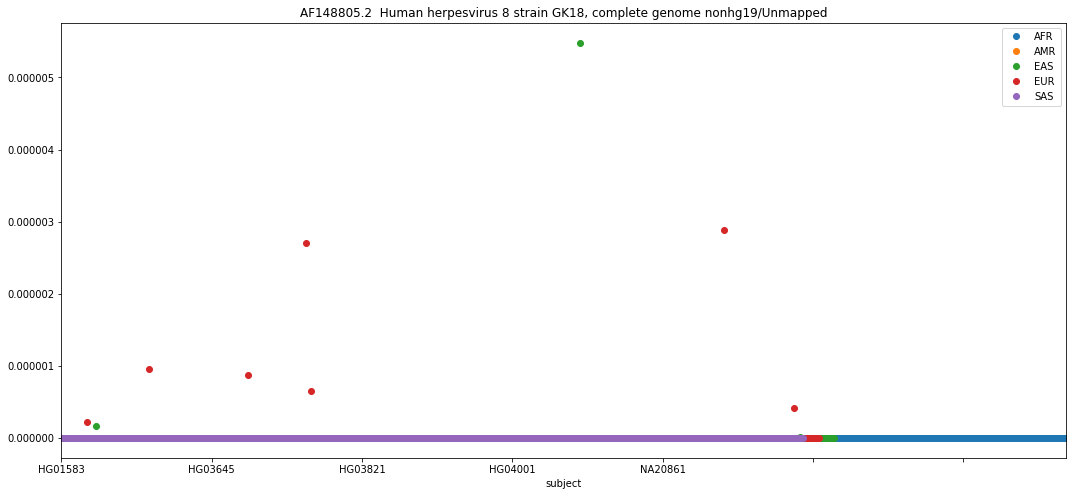

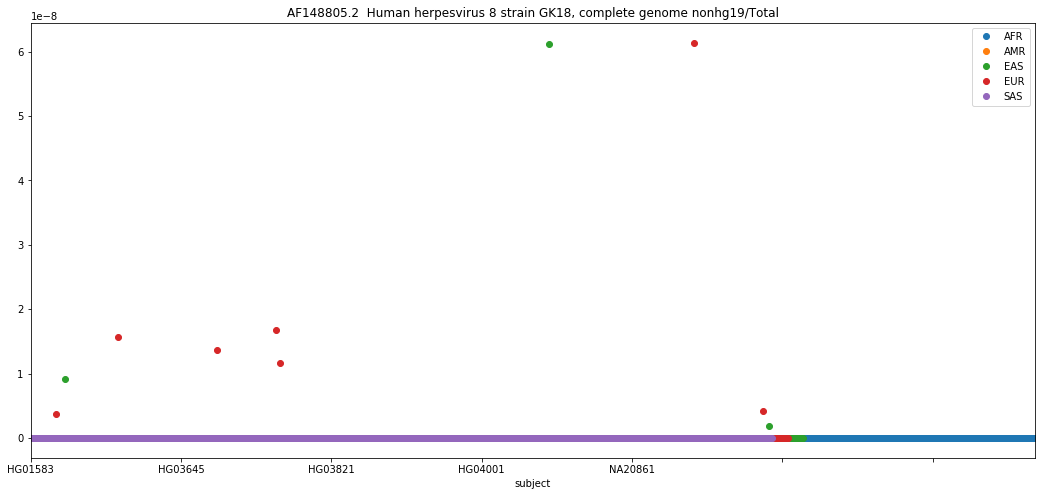

AP015015.1  Human herpesvirus 4 DNA, complete genome, strain: SNU-719


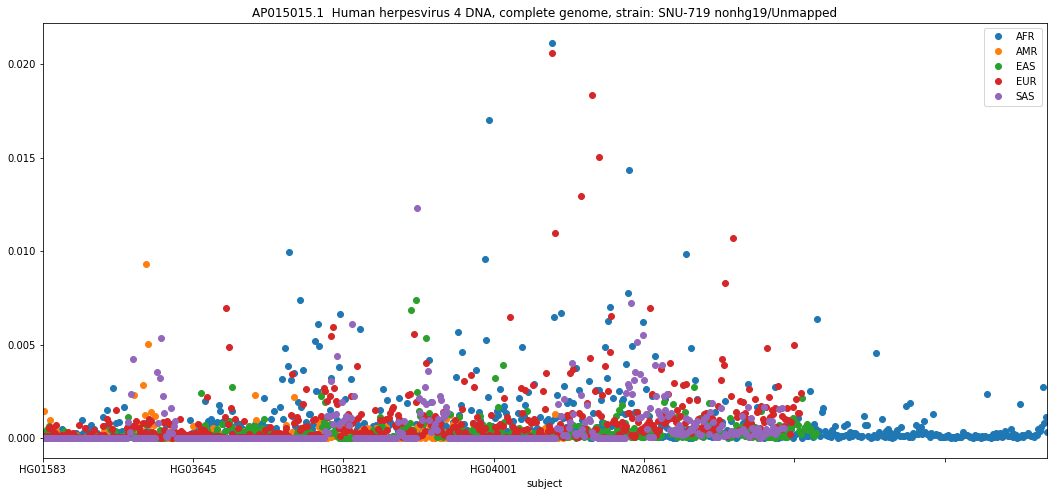

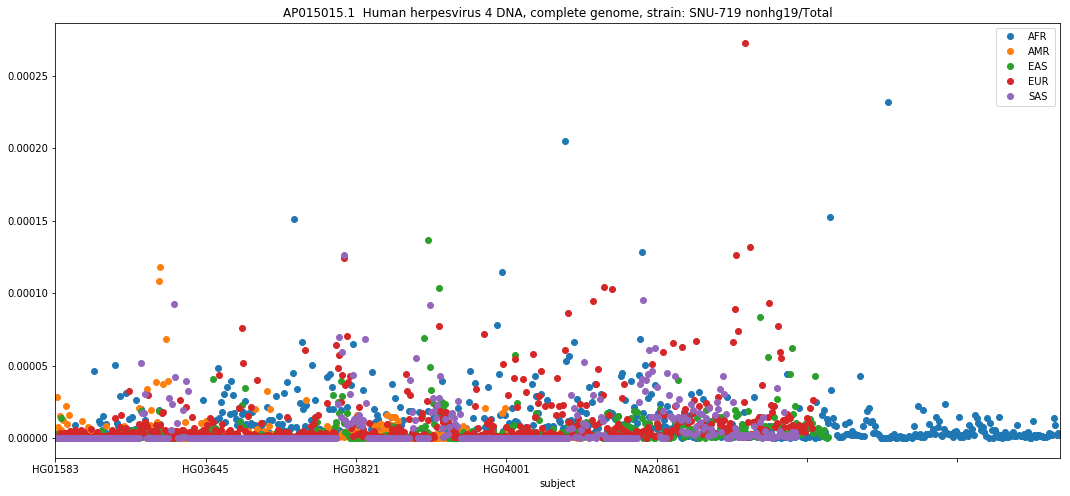

AP015016.1  Human herpesvirus 4 DNA, complete genome, strain: YCCEL1


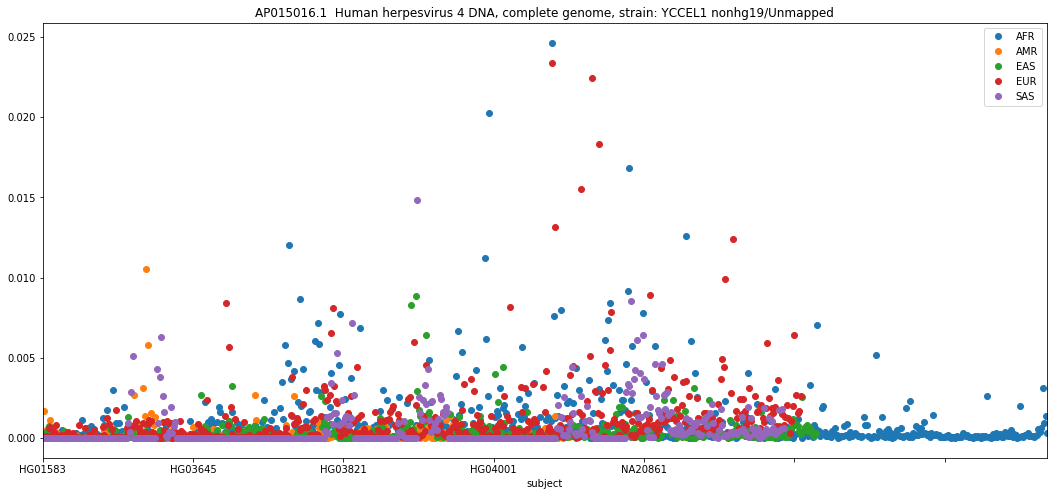

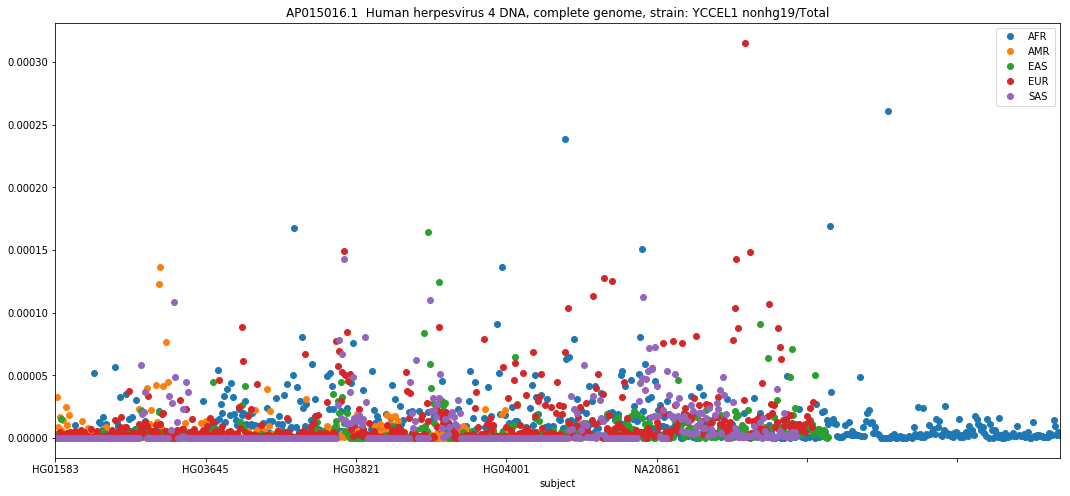

AP017458.1  Human herpesvirus 8 DNA, complete genome, strain: SPEL


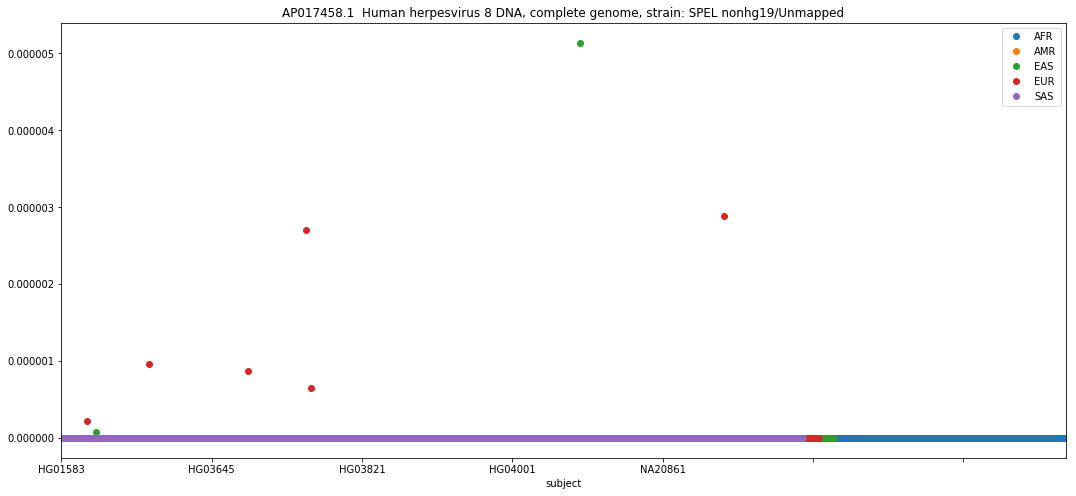

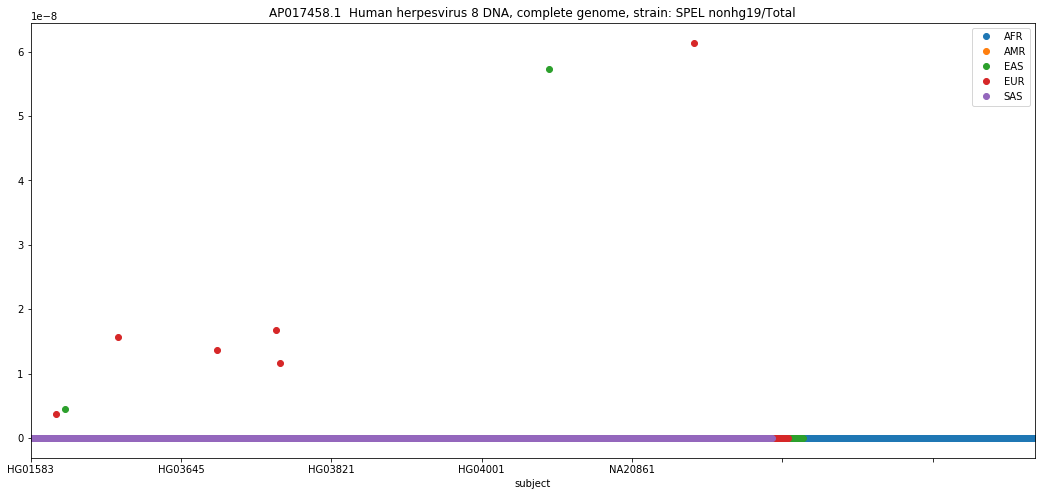

AY352275.1  HIV-1 isolate SF33 from USA, complete genome


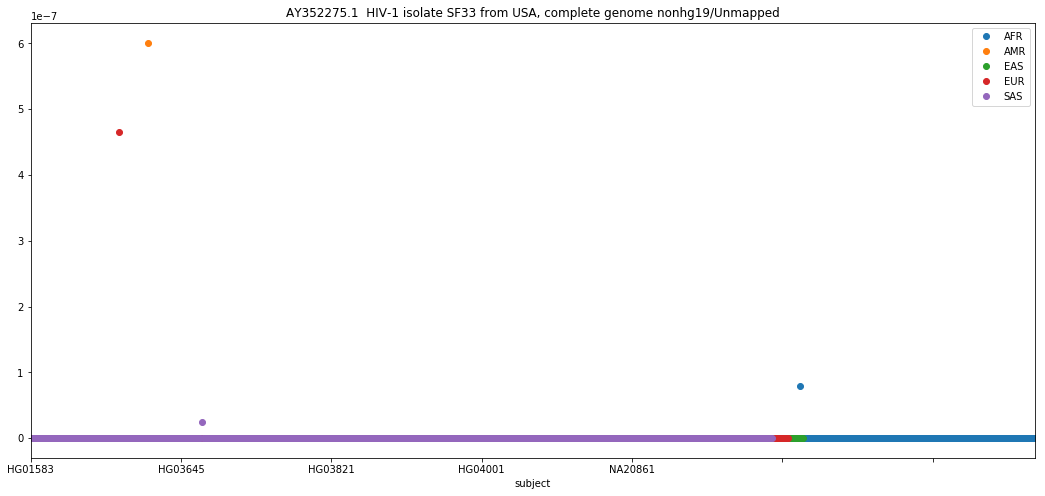

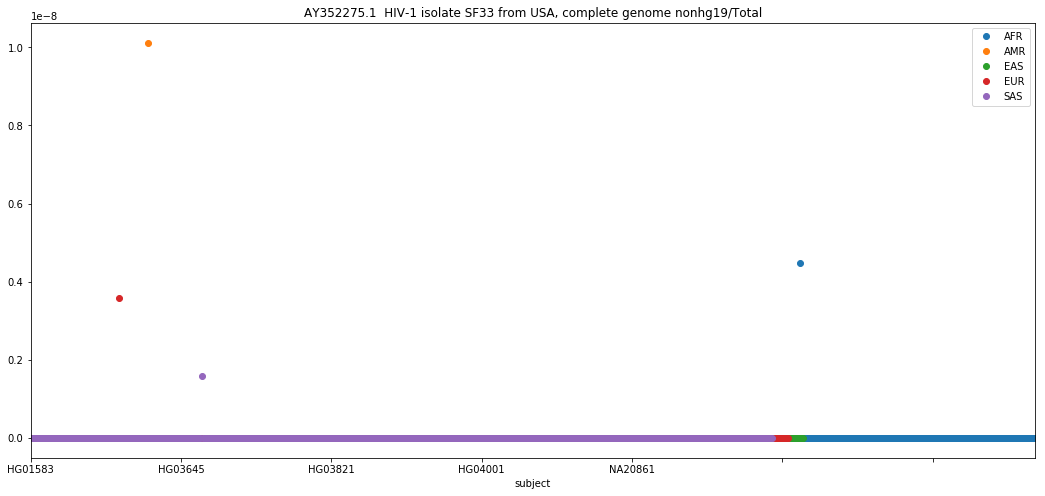

AY446894.2  Human herpesvirus 5 strain Merlin, complete genome


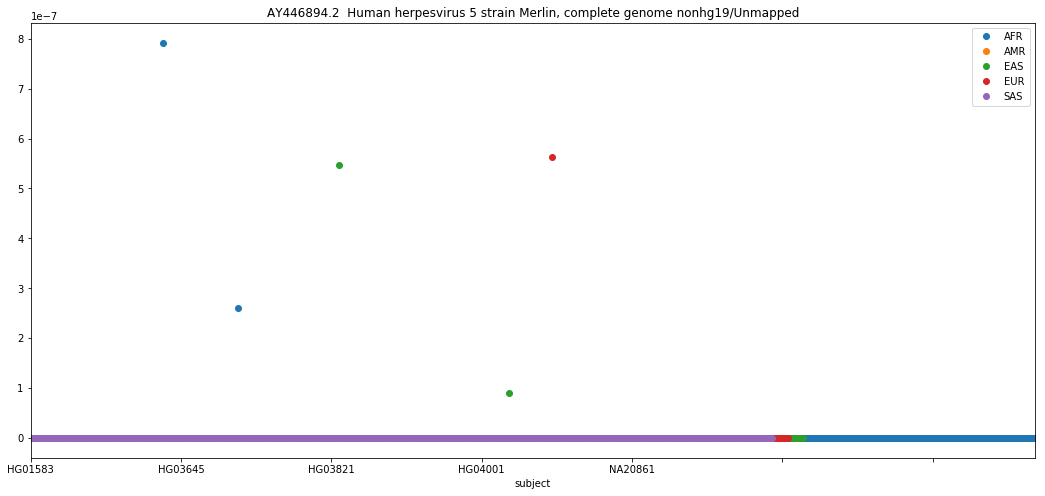

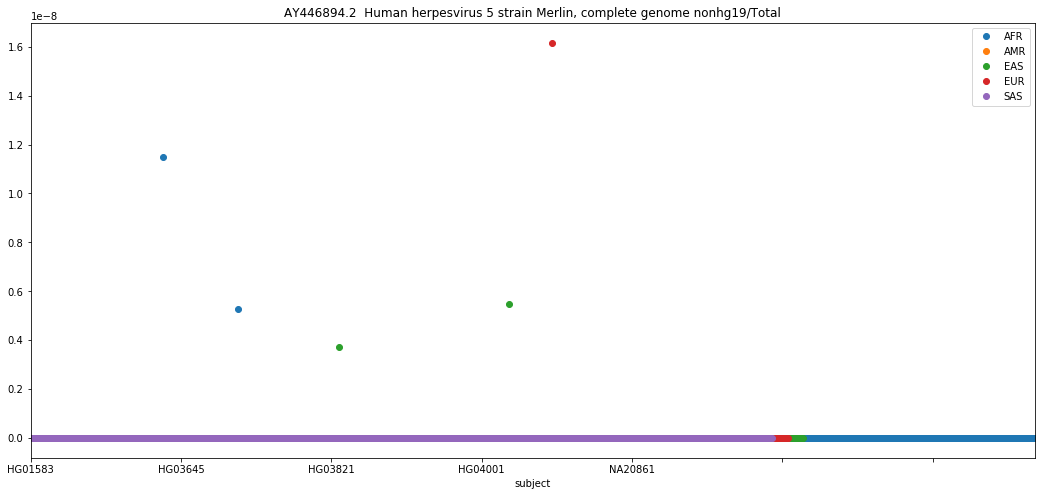

D13784.1  Human T-lymphotropic virus 1 proviral DNA, complete genome


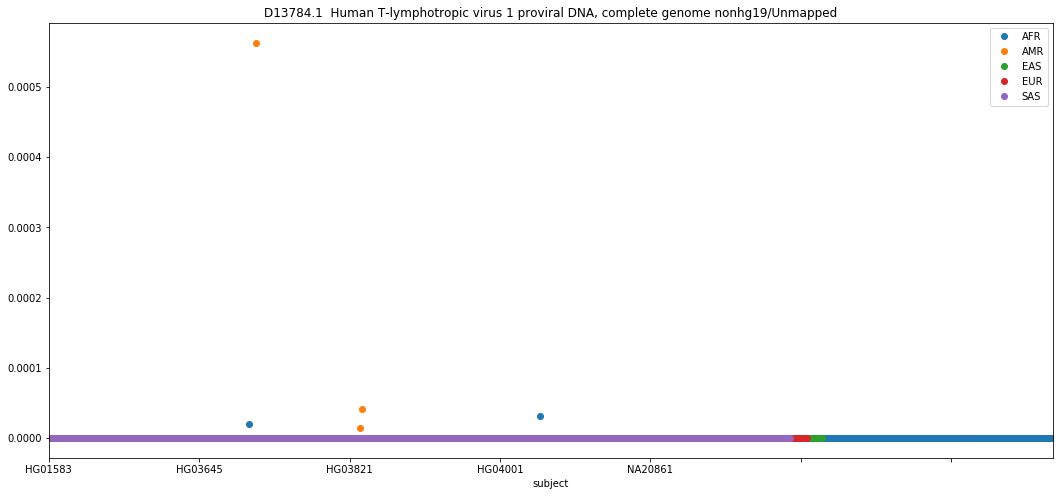

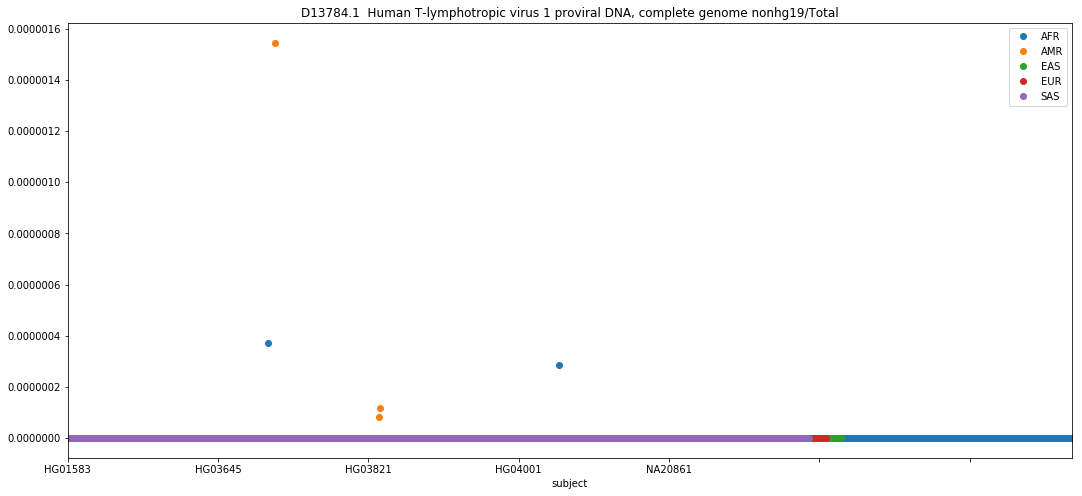

D26561.1  Human papillomavirus type 5b proviral genes for L1 protein, E6 protein, E7 protein, E1 protein, partial and complete cds


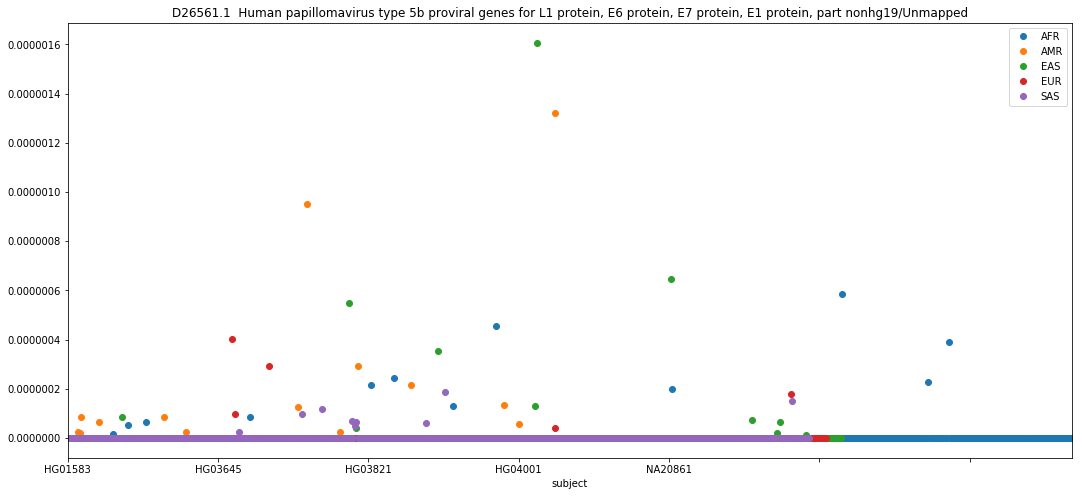

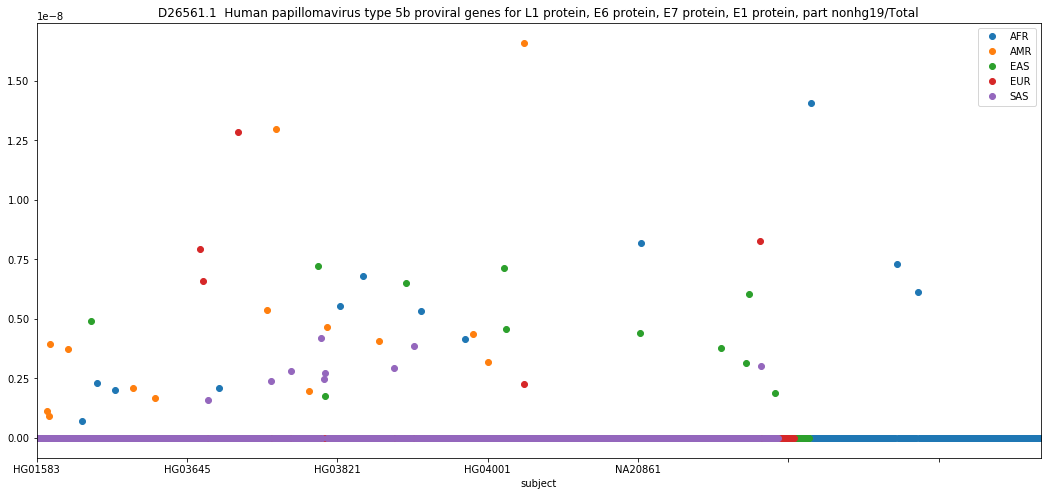

DQ093792.1  Human T-lymphotropic virus 3 strain 2026ND, complete genome


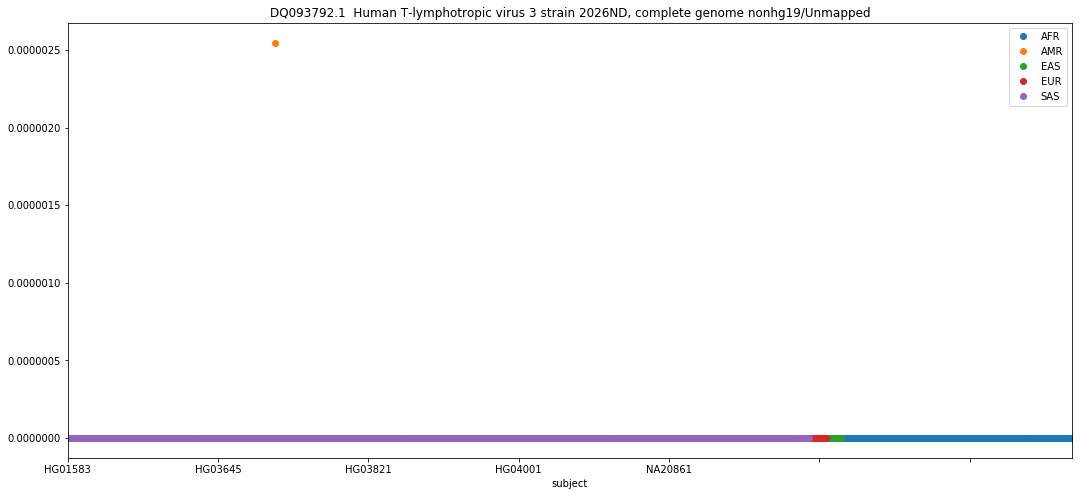

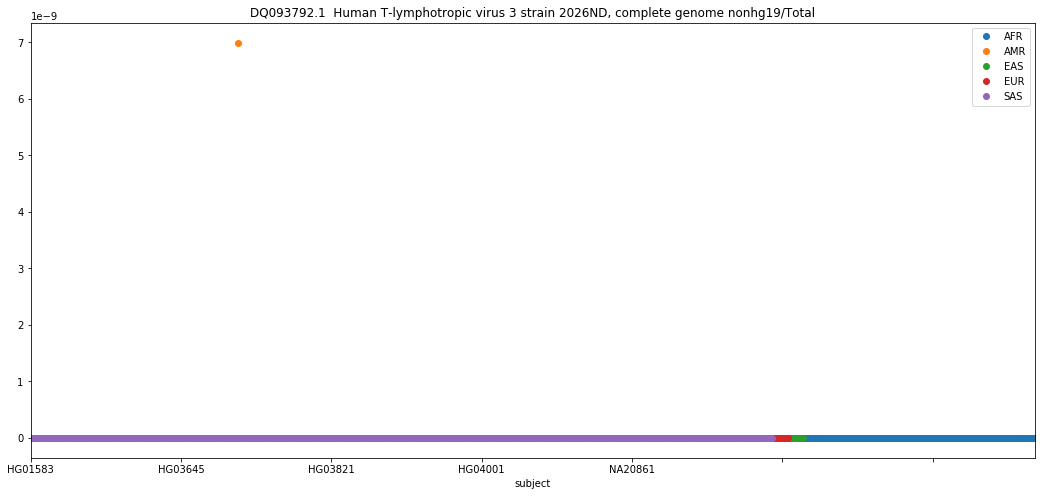

EF999921.1  Human herpesvirus 5 strain TB40/E clone TB40-BAC4, complete sequence


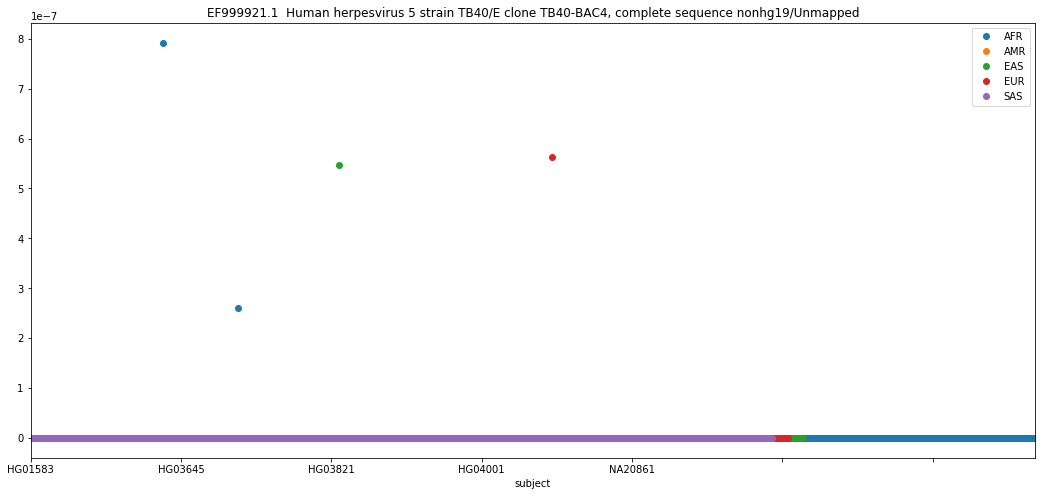

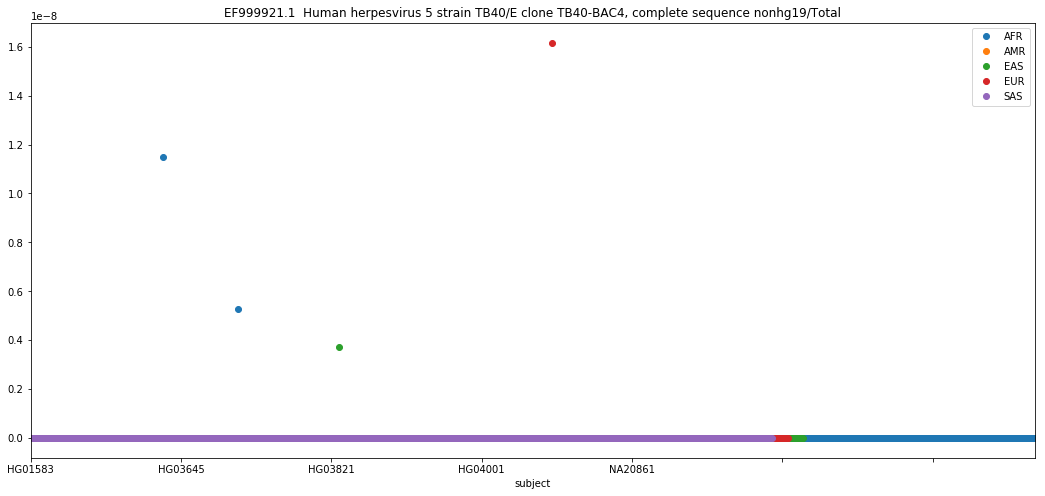

FJ527563.1  Human herpesvirus 5 strain AD169, complete genome


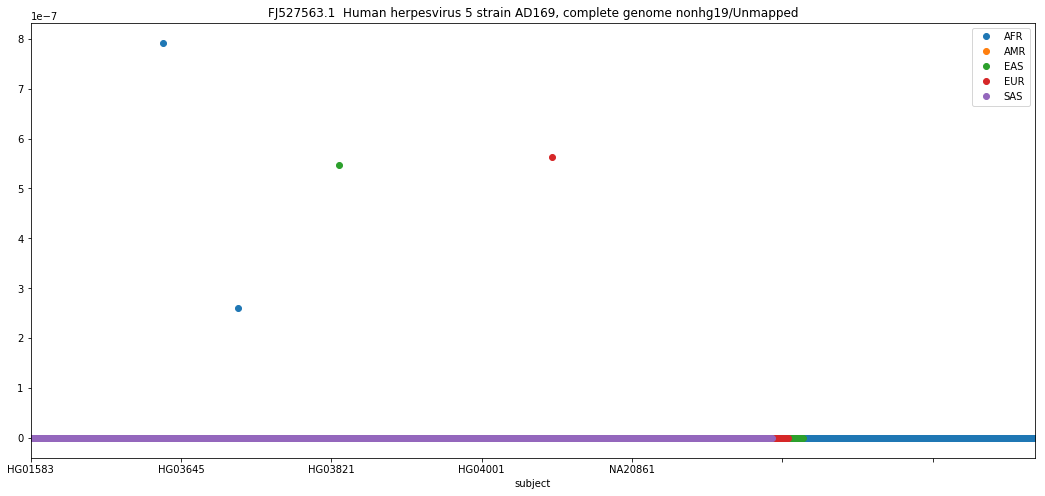

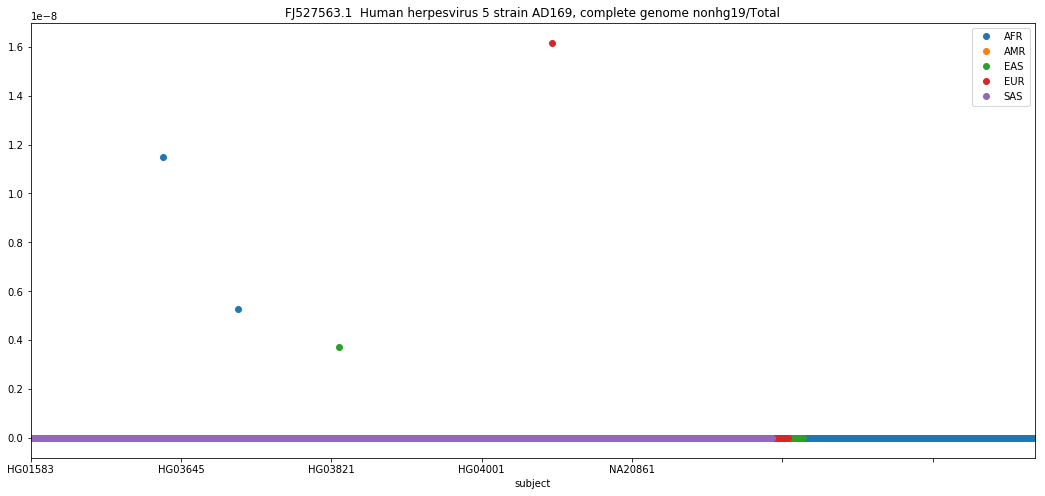

GQ221974.1  Human herpesvirus 5 strain 3157, complete genome


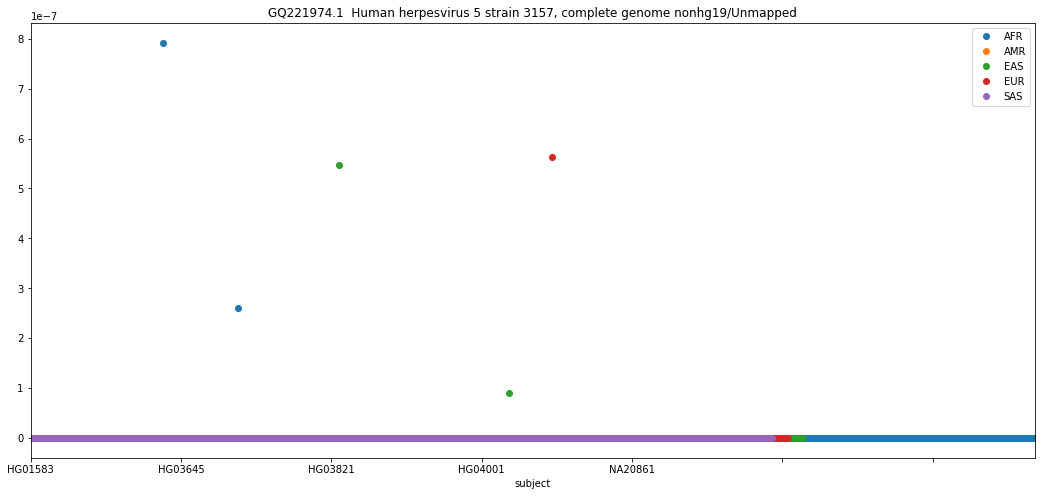

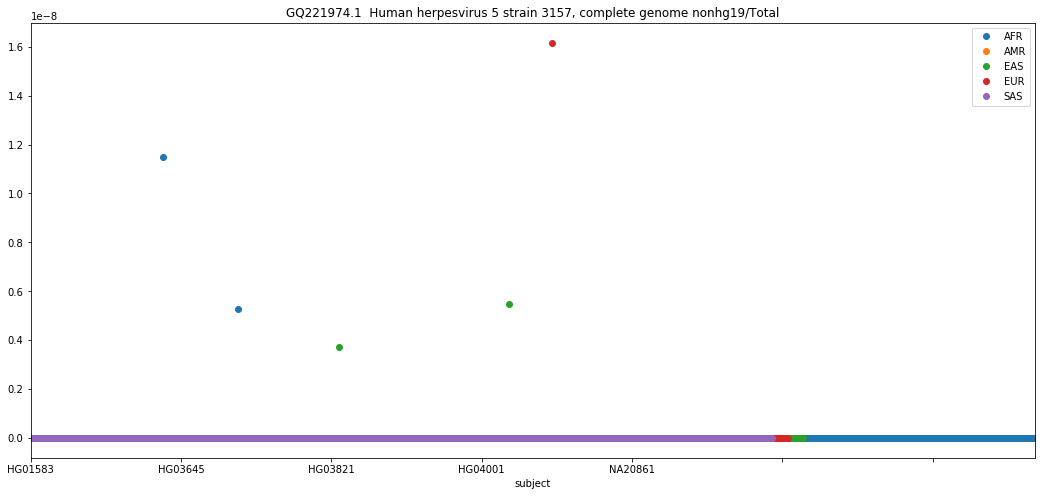

GQ396662.1  Human herpesvirus 5 strain HAN38, complete genome


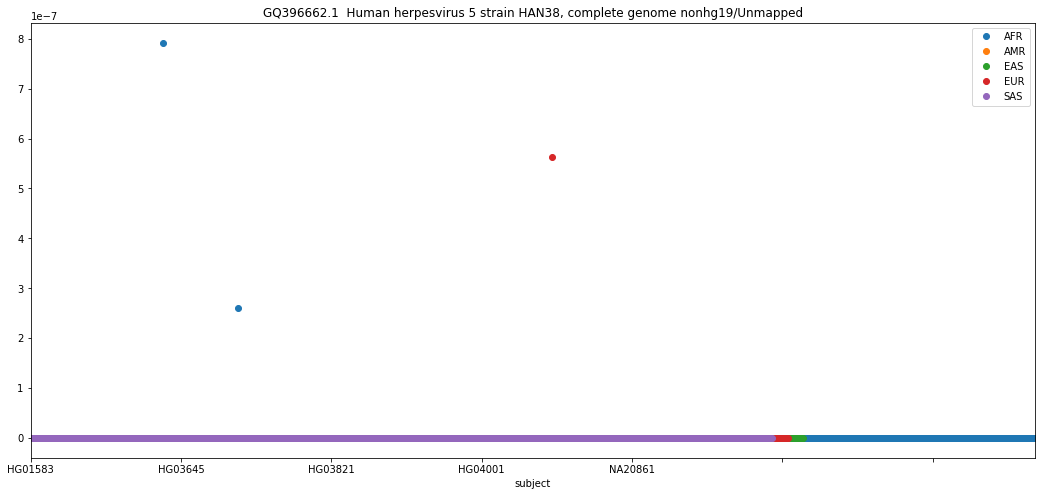

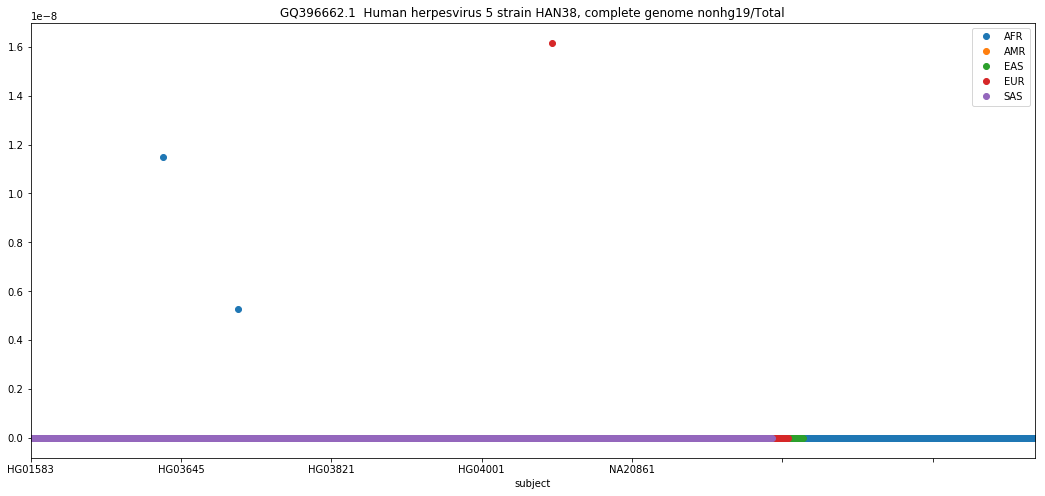

GQ994935.1  Human herpesvirus 8 strain JSC-1 clone BAC16, complete genome


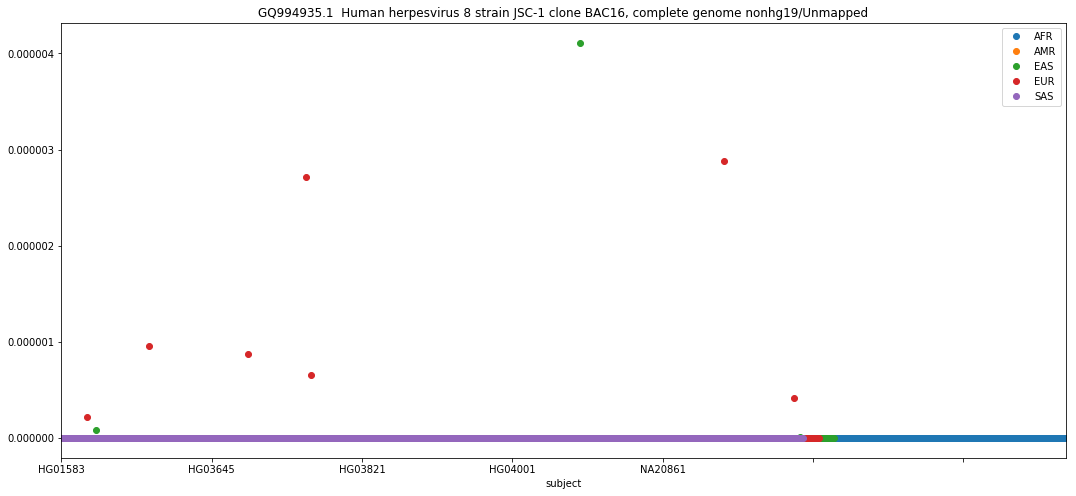

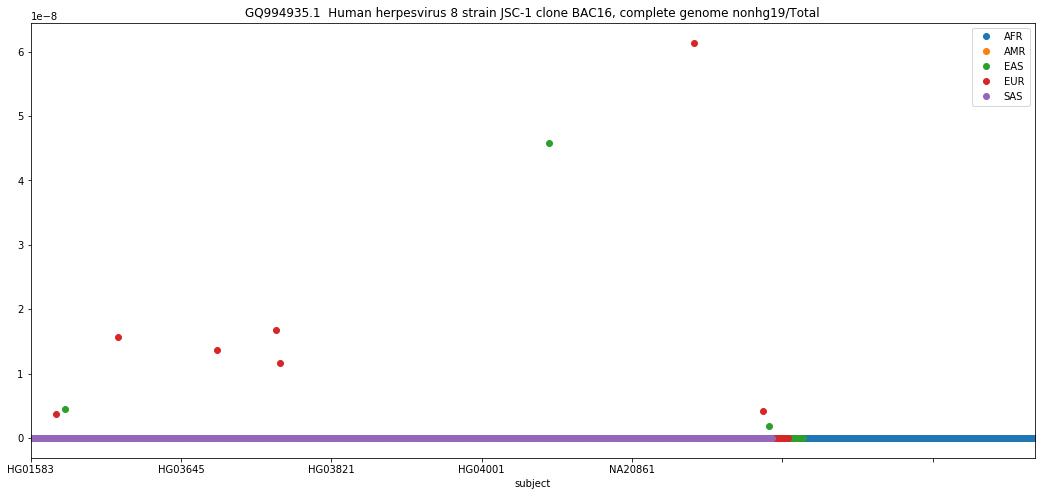

GU937742.2  Human herpesvirus 5 strain Toledo, complete genome


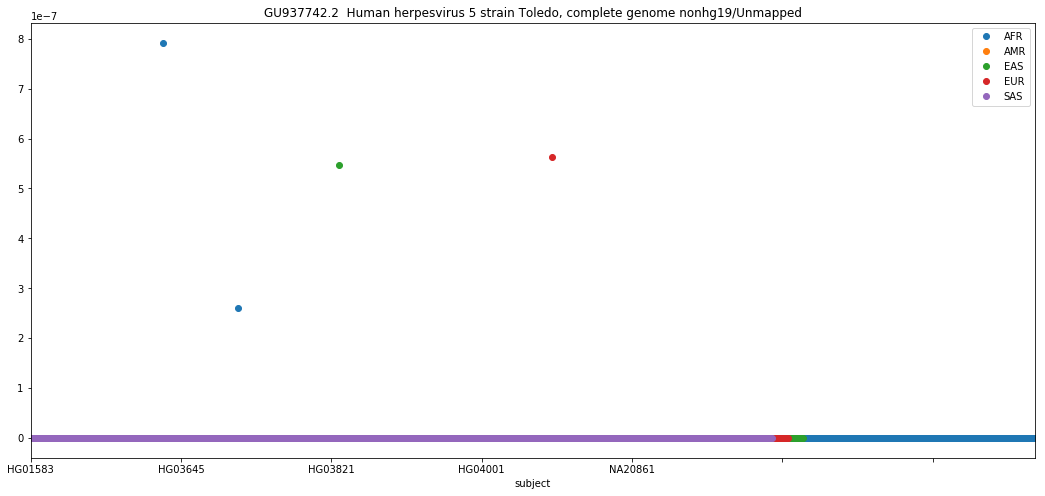

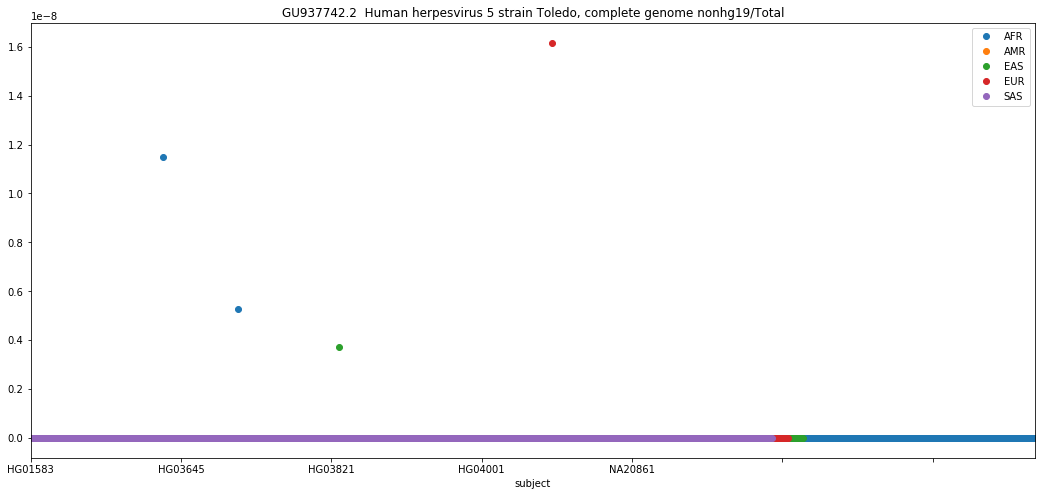

HQ646552.1  Hepatitis B virus clone 18.15, complete genome


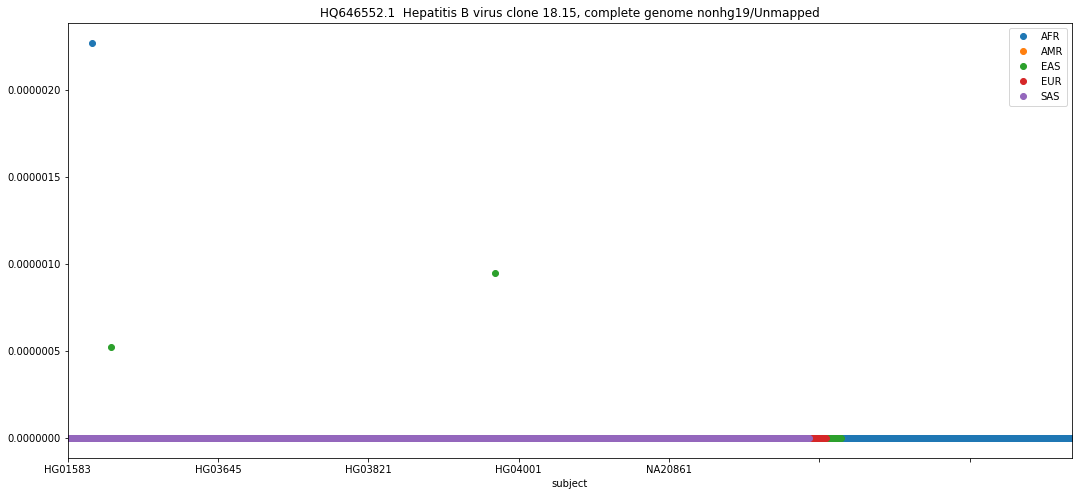

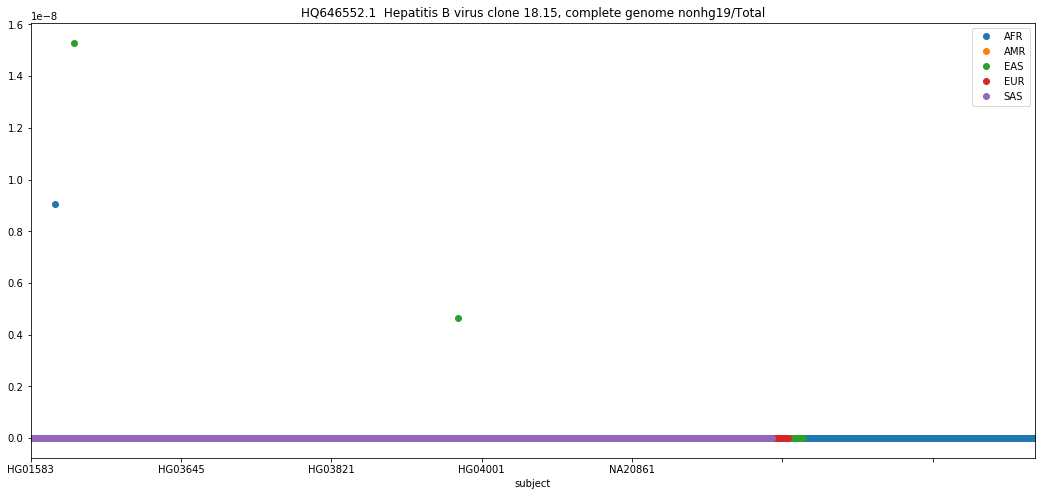

HQ646553.1  Hepatitis B virus clone 18.1, complete genome


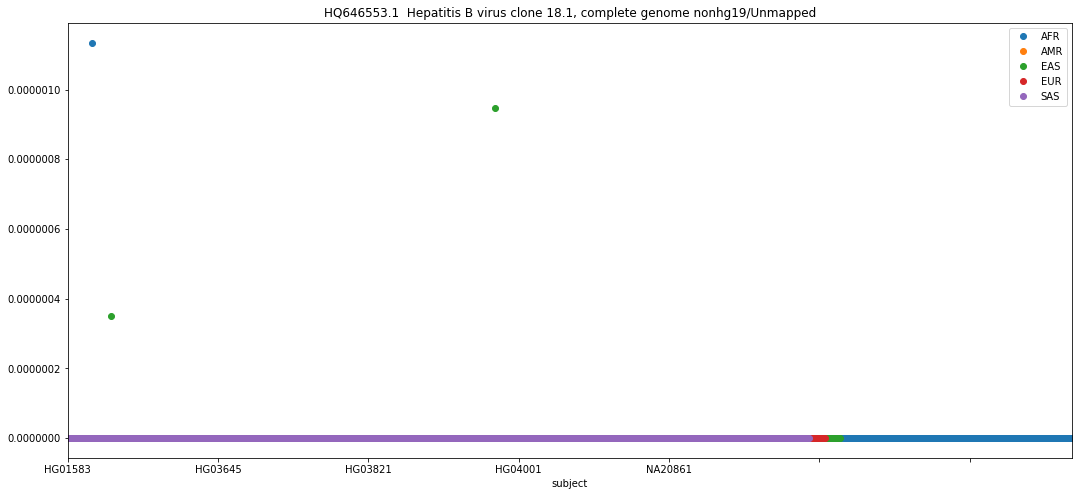

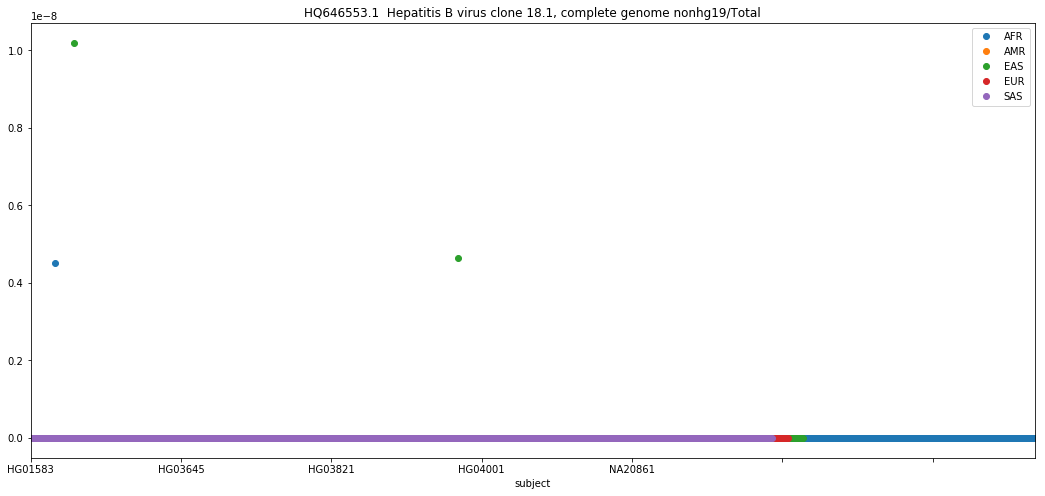

HQ646554.1  Hepatitis B virus clone 18.20, complete genome


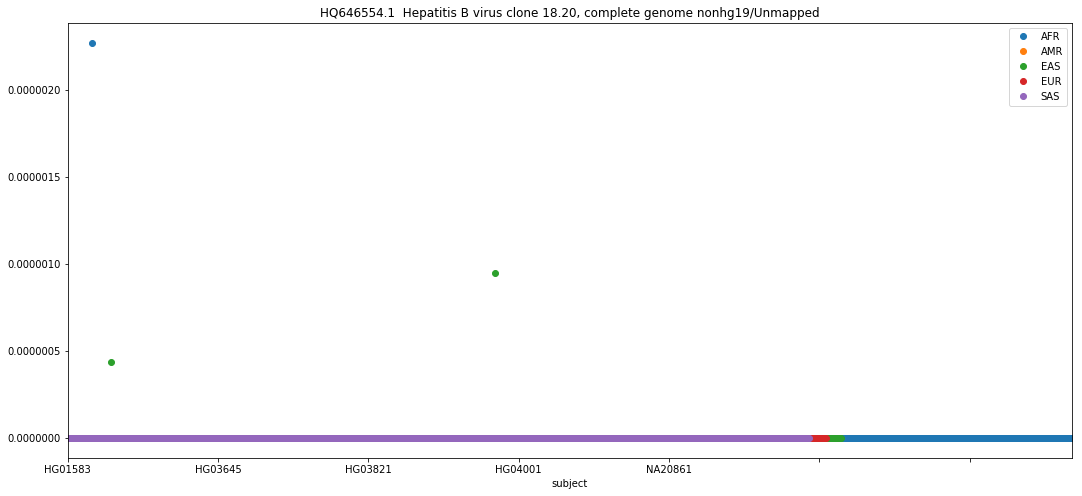

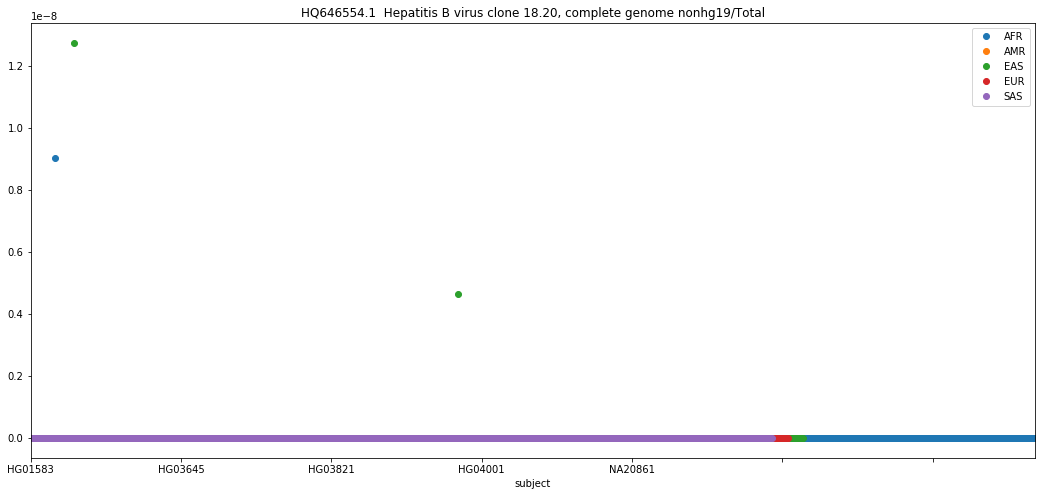

HQ646555.1  Hepatitis B virus clone 18.31, complete genome


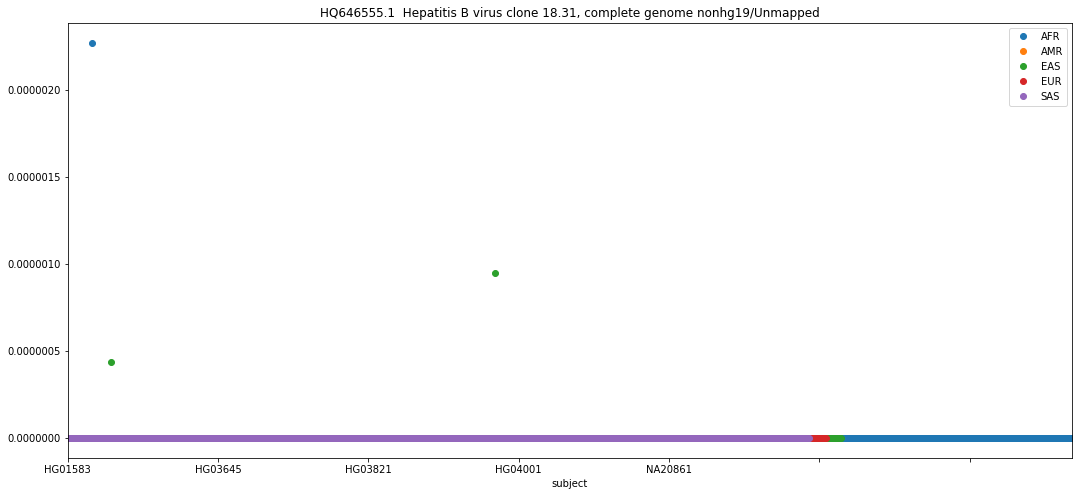

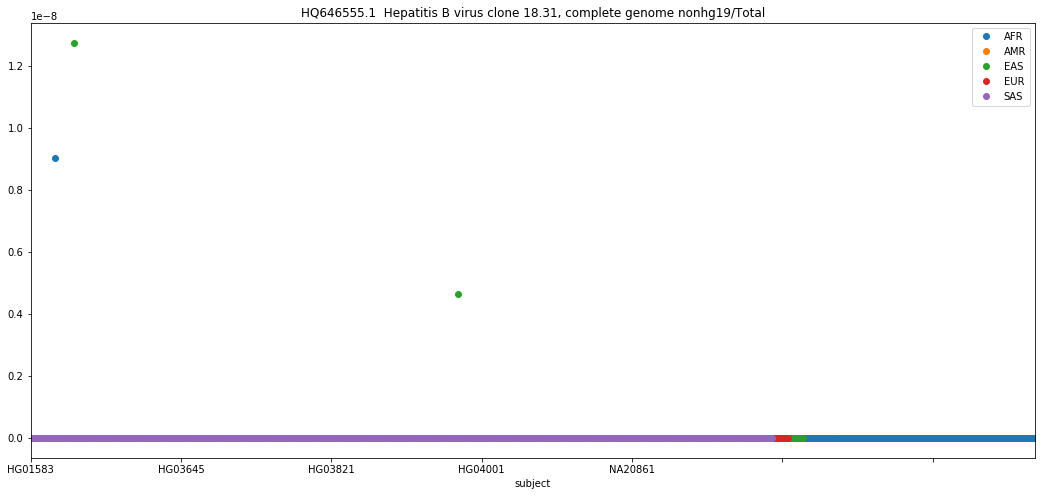

HQ646556.1  Hepatitis B virus clone 18.12, complete genome


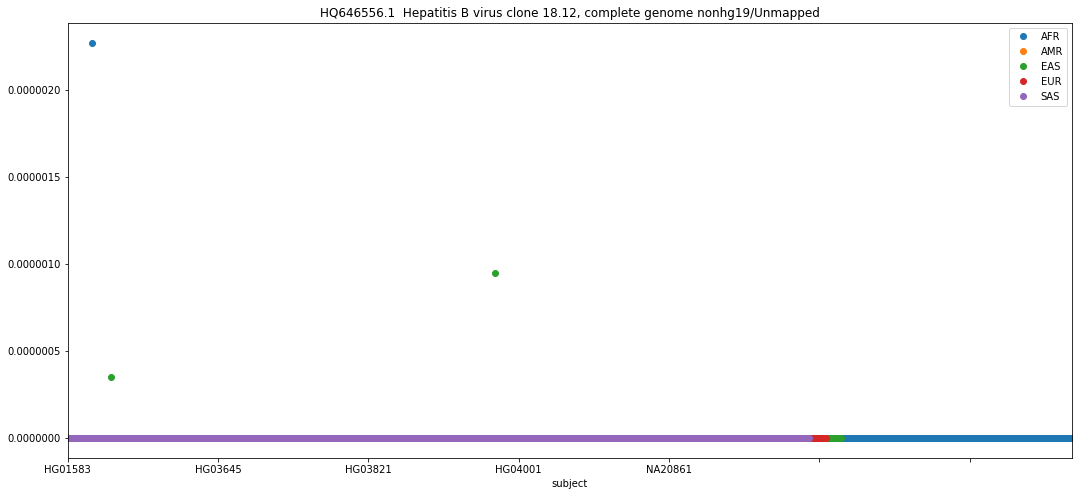

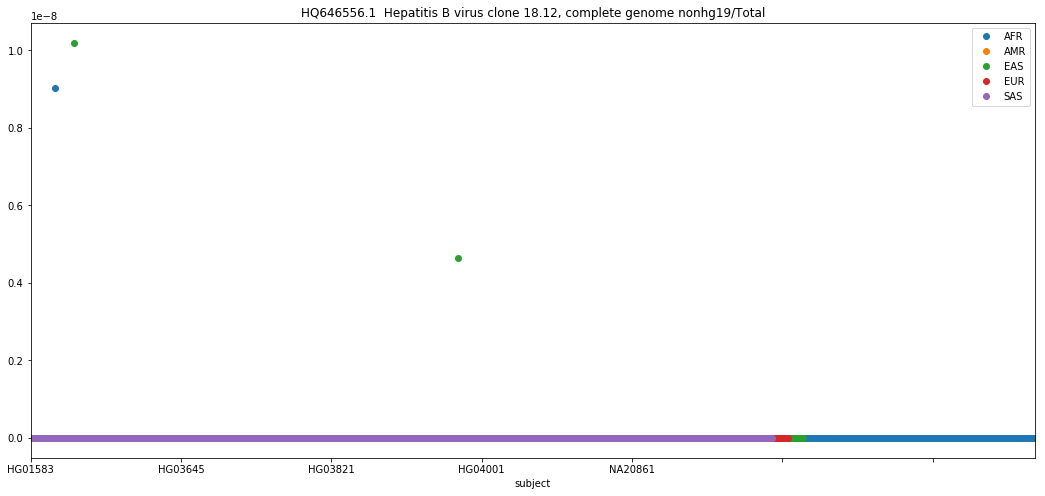

JQ619843.1  Human herpesvirus 8 strain DG1, complete genome


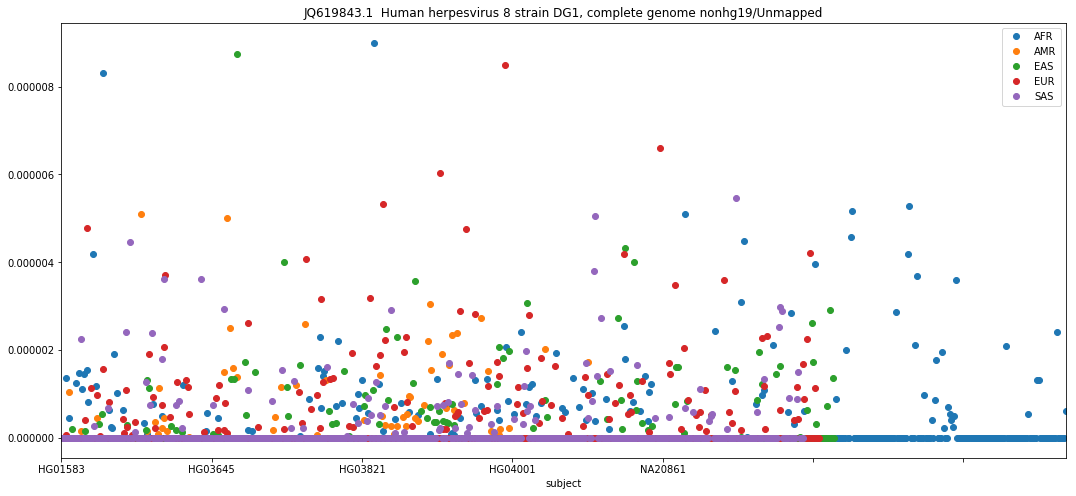

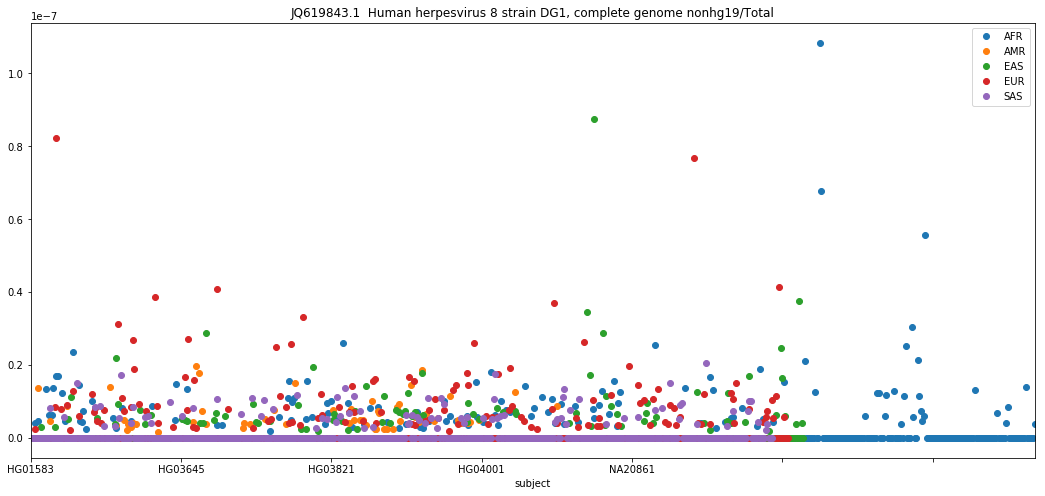

K02007.1  Human immunodeficiency virus type 1, isolate ARV-2/SF2, complete proviral genome


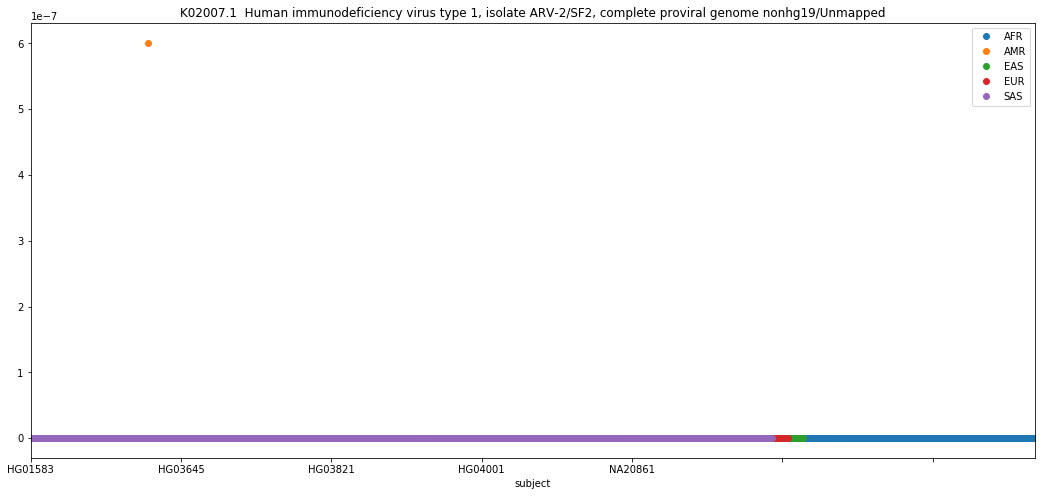

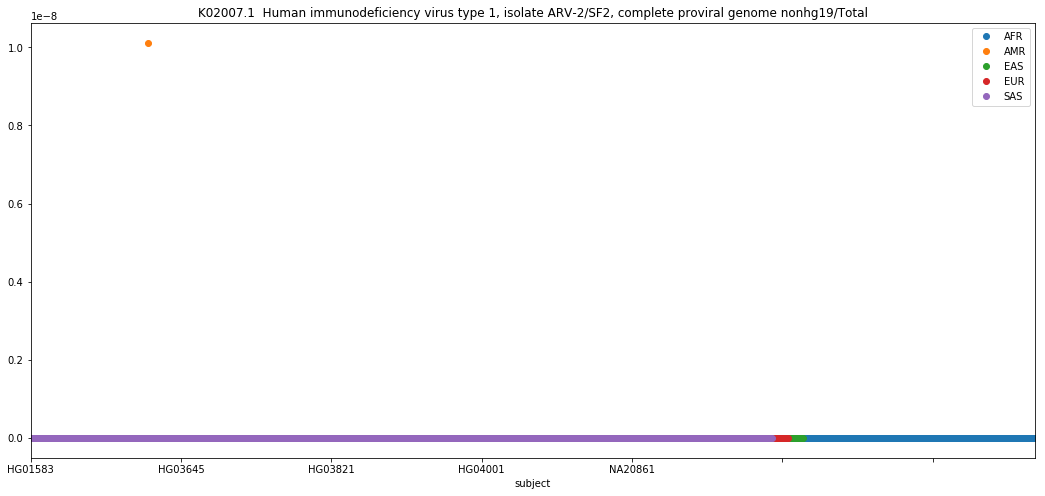

K03455.1  Human immunodeficiency virus type 1 (HXB2), complete genome; HIV1/HTLV-III/LAV reference genome


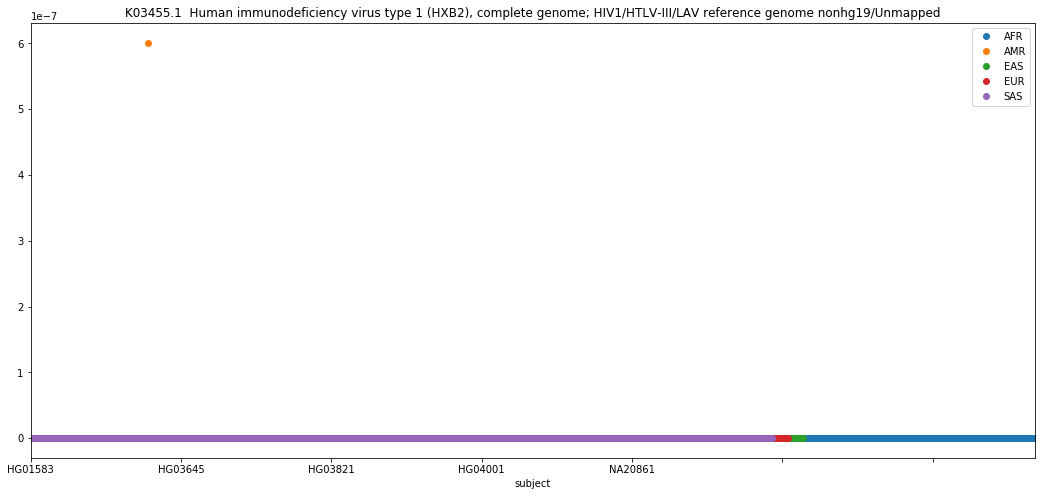

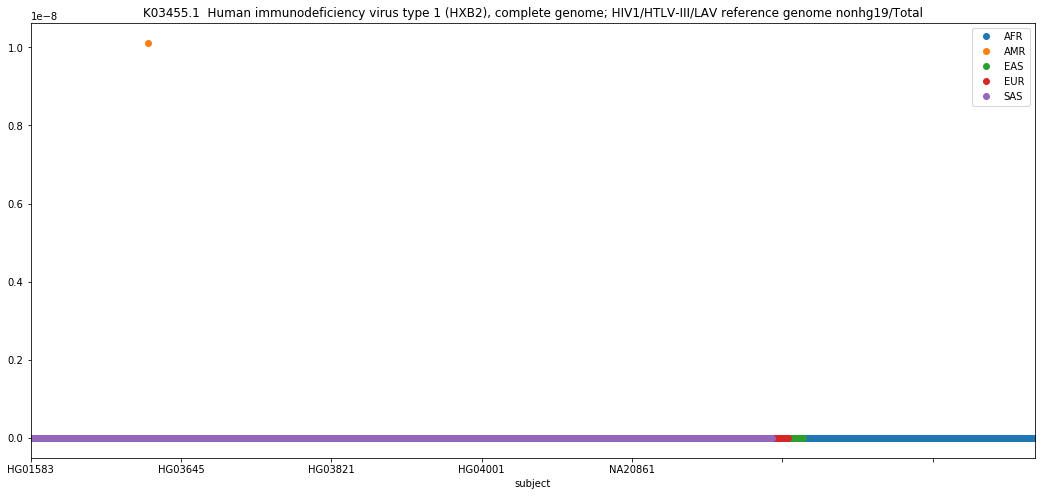

KF021605.1  Human herpesvirus 5 strain TR, complete genome


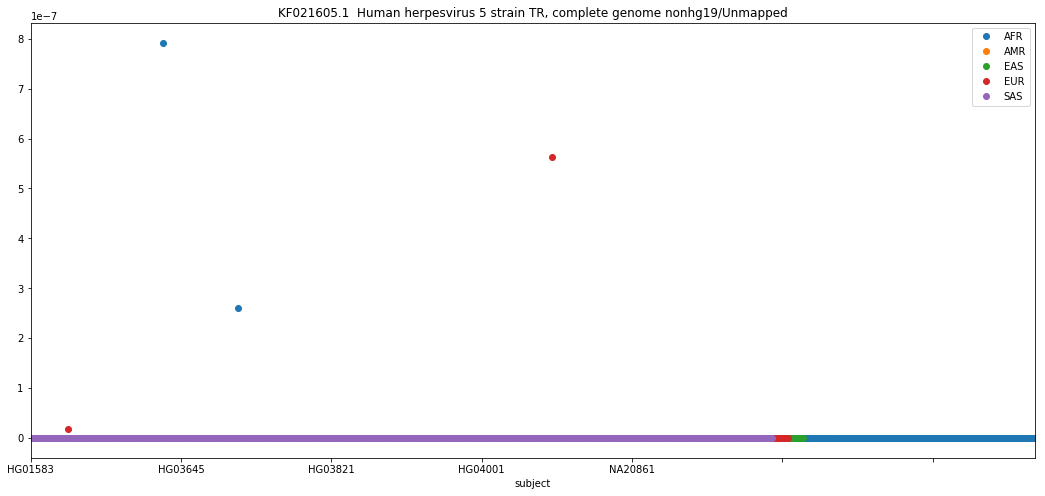

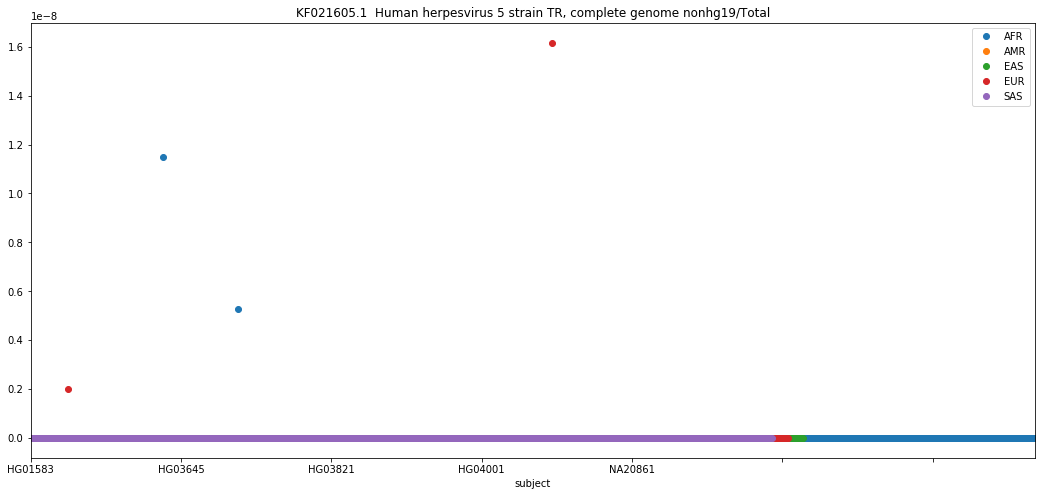

KF297339.1  Human herpesvirus 5 strain TB40/E clone Lisa, complete genome


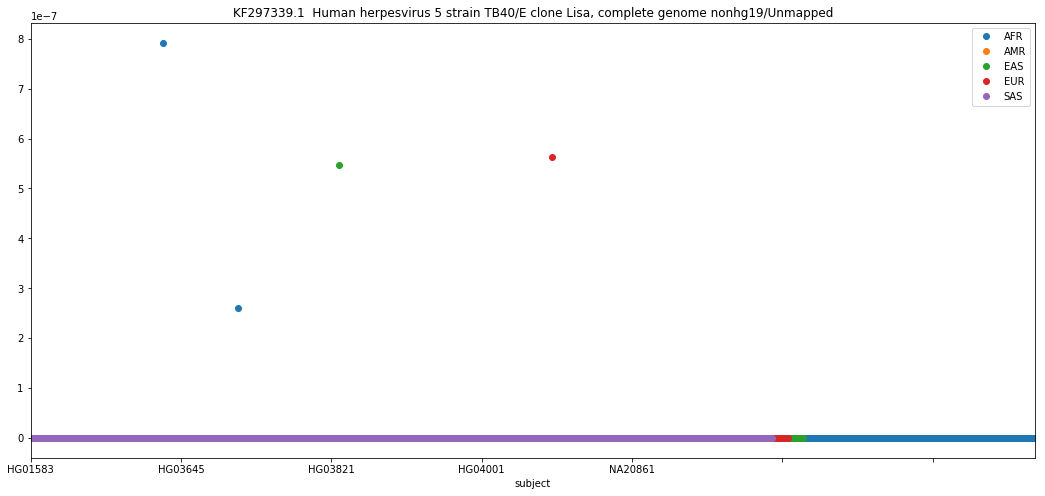

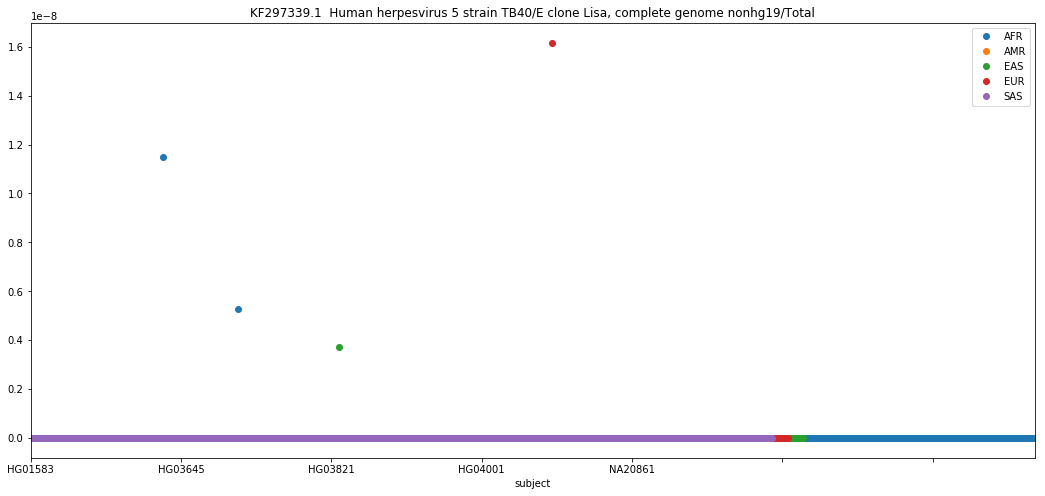

KF588566.1  Human herpesvirus 8 clone BrK.219#1_4, complete genome


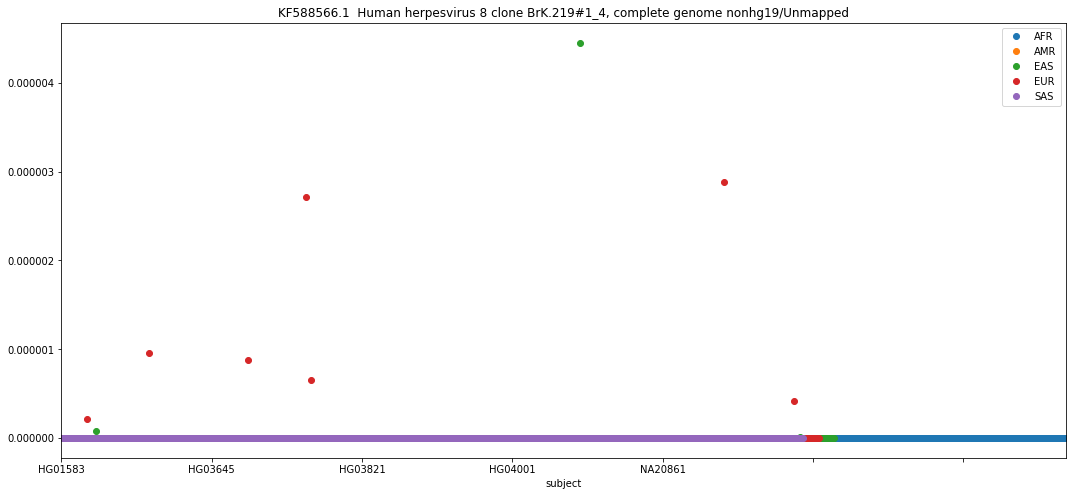

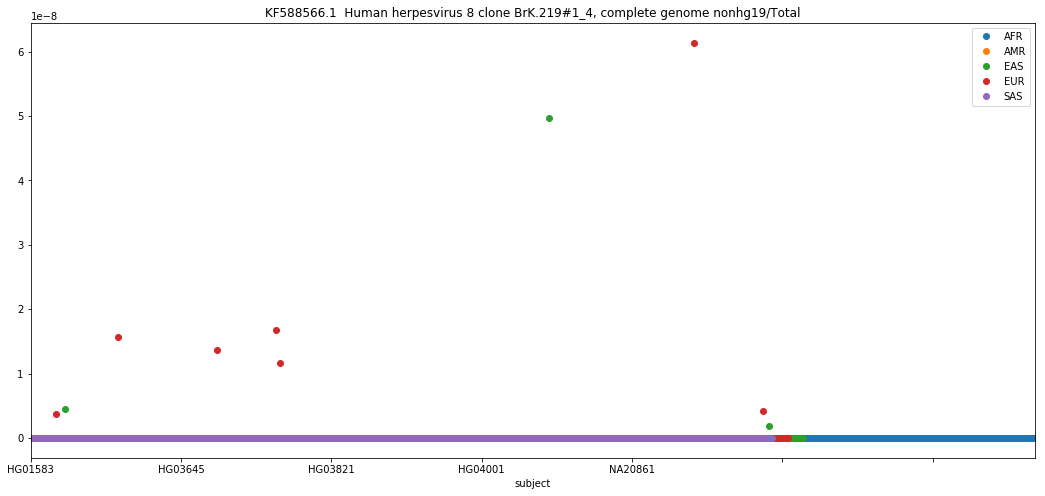

KM111555.2  Human immunodeficiency virus isolate JS2011001 from China gag polyprotein (gag) gene, complete cds; pol polyprotein (pol) gene, partial cds; vif protein (vif), vpr protein (vpr), tat protein (tat), rev protein (rev), and vpu protein (vpu) genes, complete cds; and nef protein (nef) gene, partial cds


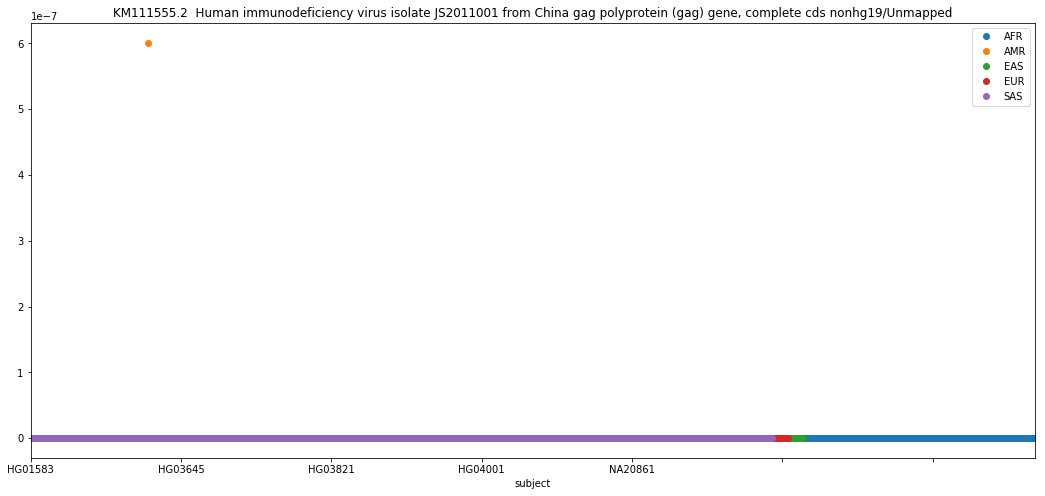

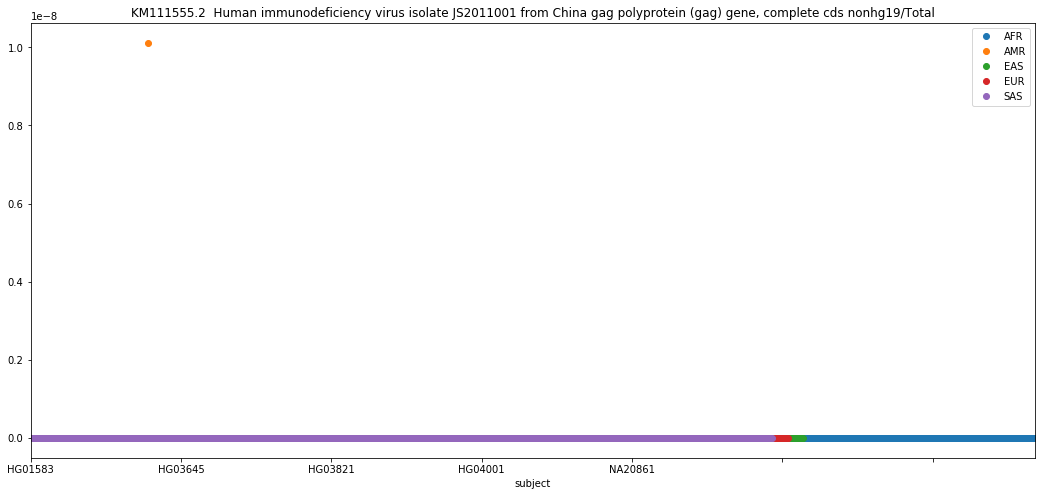

KP257584.1  Human herpesvirus 6A isolate AJ, complete genome


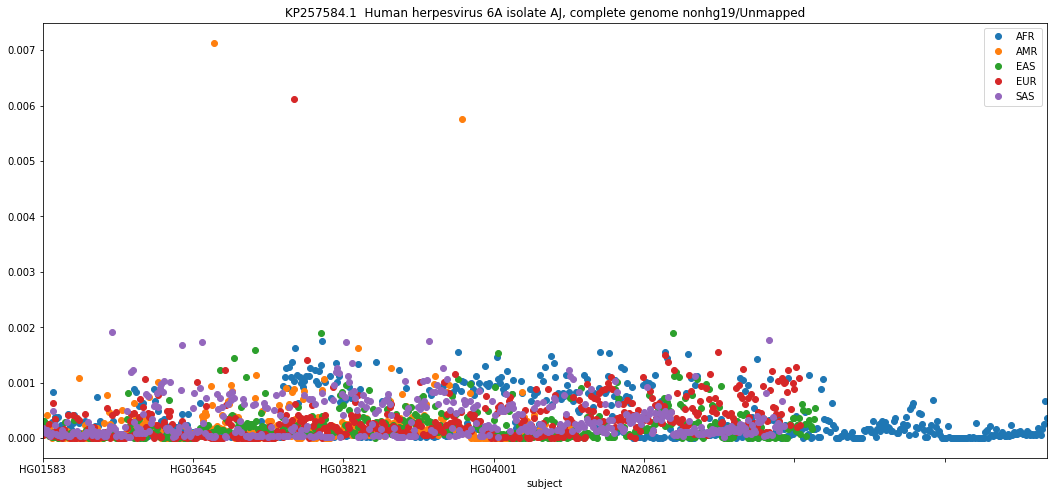

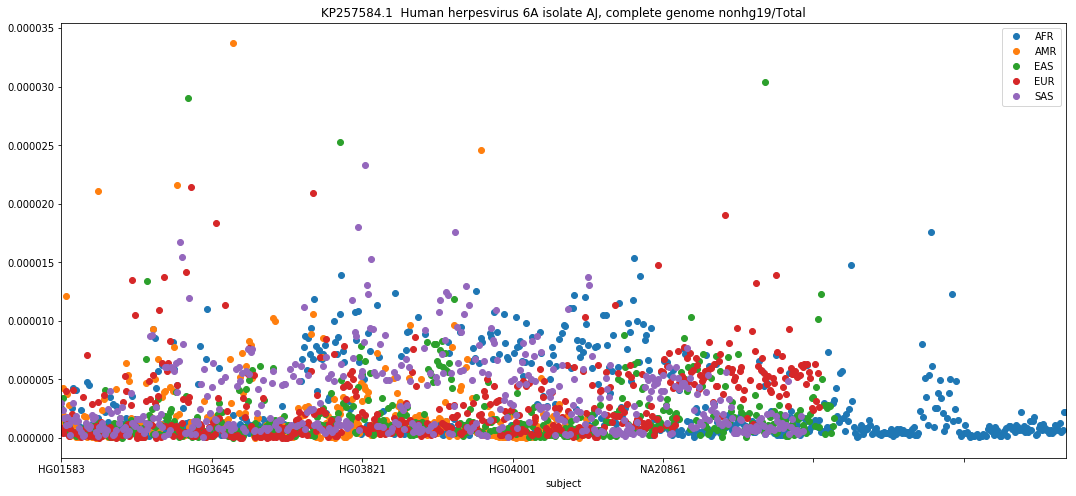

KX905202.1  Human T-lymphotropic virus 1 isolate VAN-EM5, complete genome


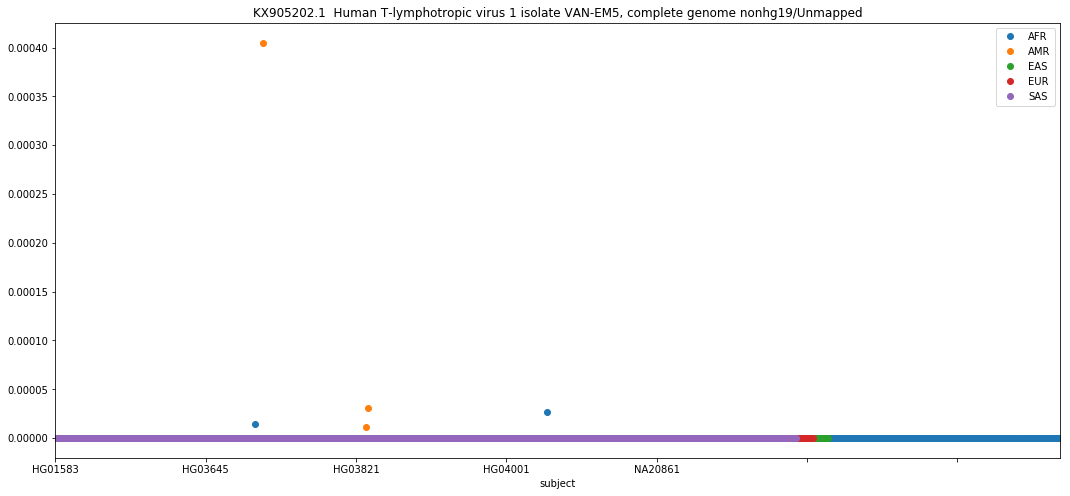

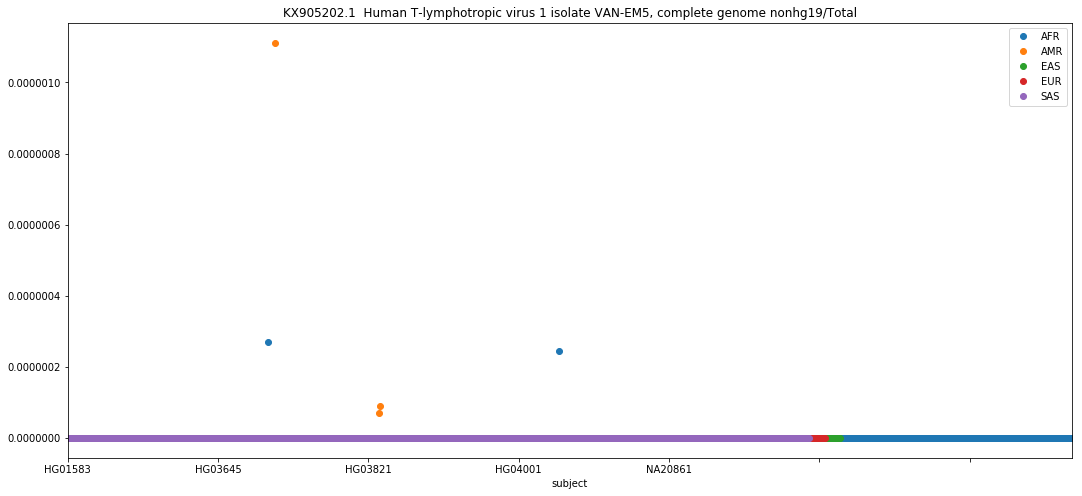

KY002685.1  Human adenovirus isolate Yunnan/KM04/2016, complete genome


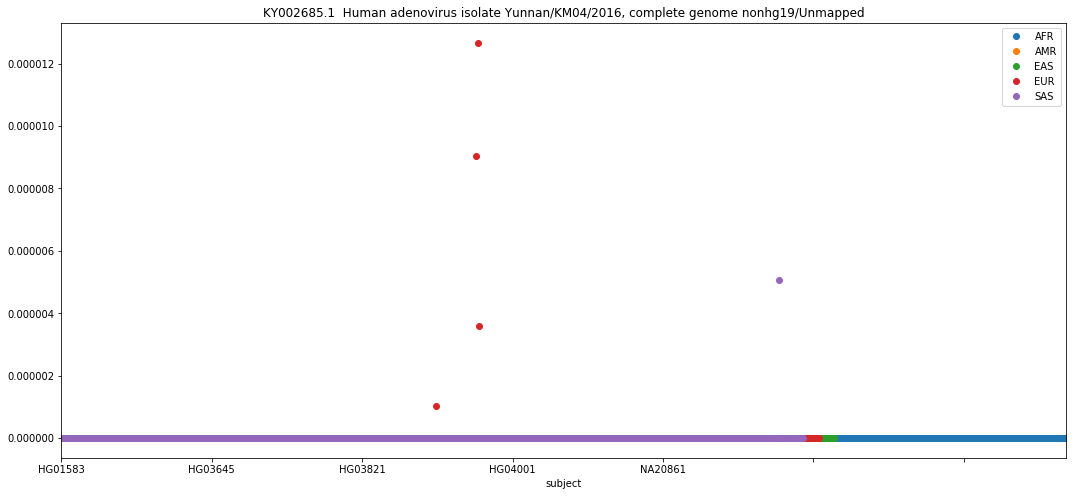

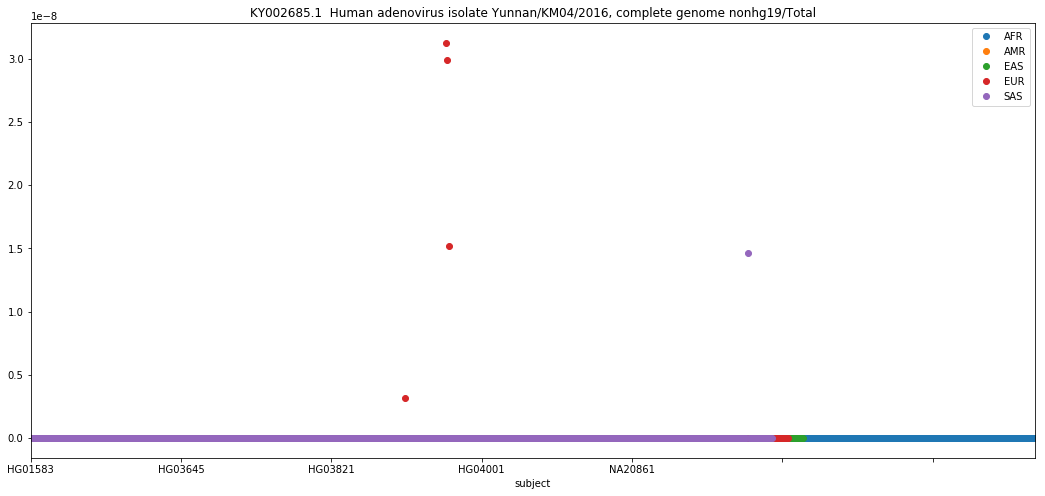

KY094066.1  BeAn 58058 virus, complete genome


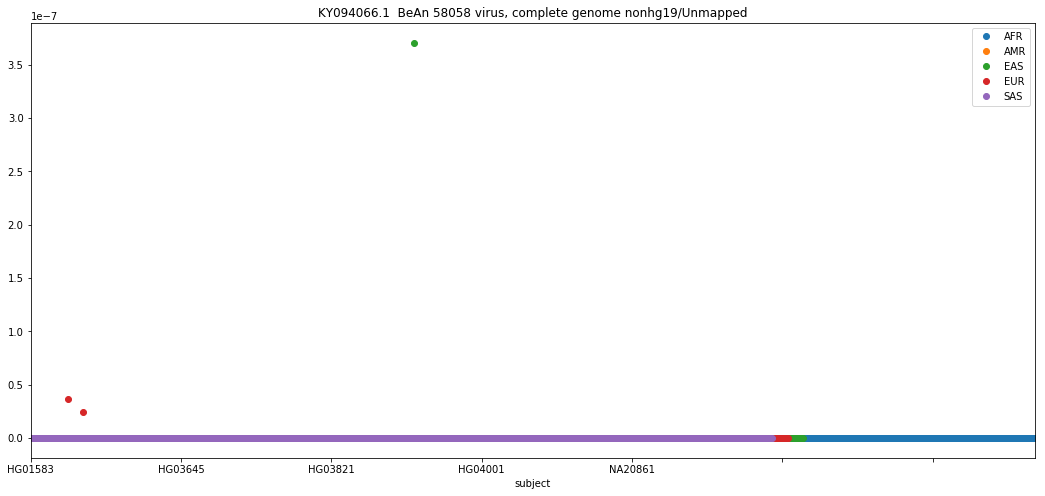

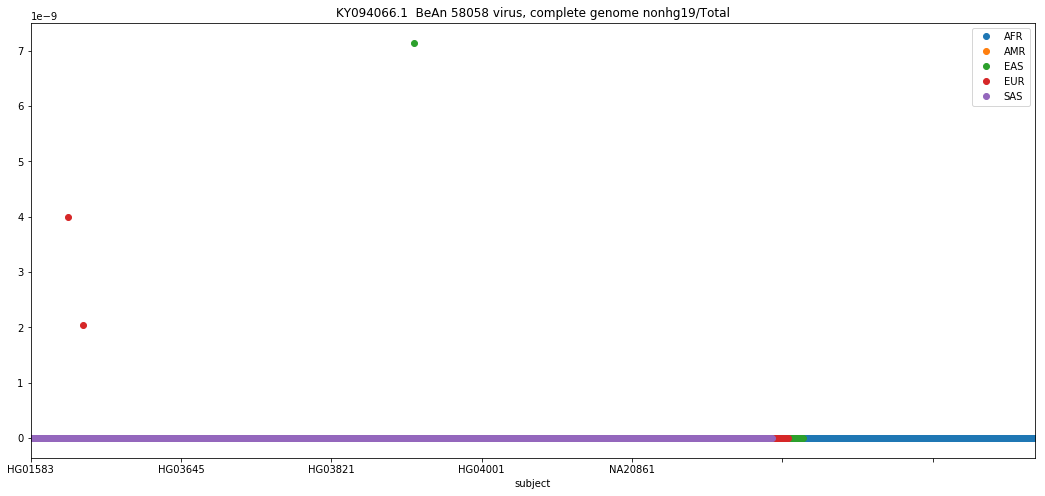

LC215429.1  Human adenovirus DNA, complete genome, strain: case67_20121578


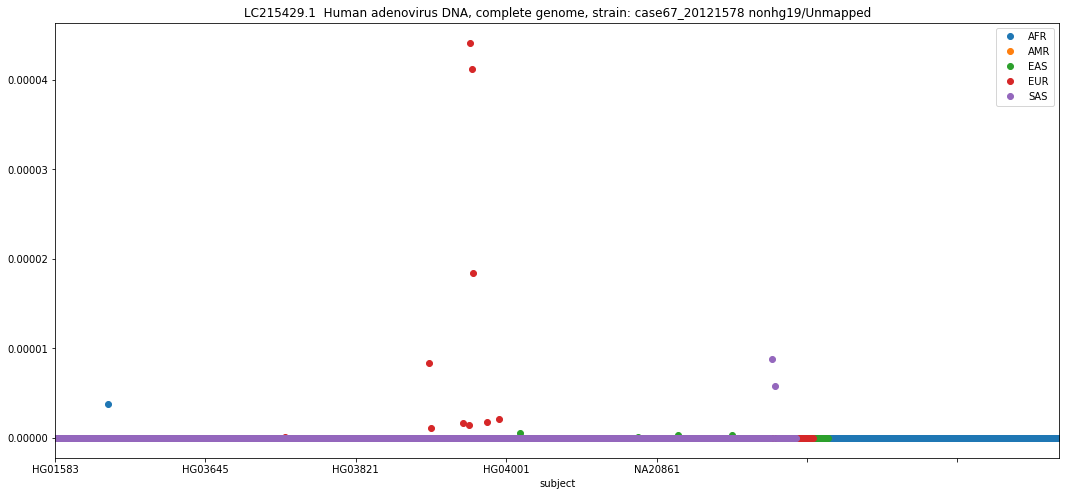

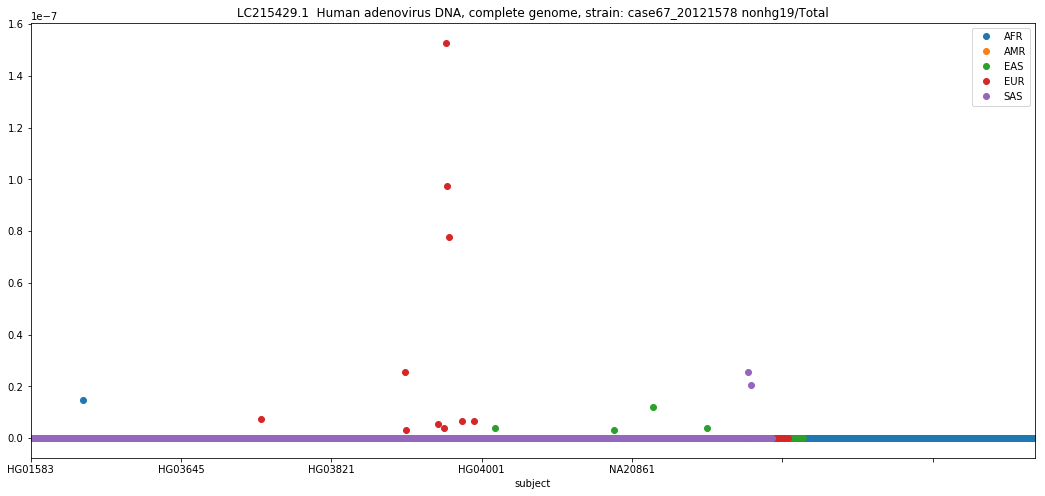

LC215433.1  Human adenovirus DNA, complete genome, strain: case110_20131573


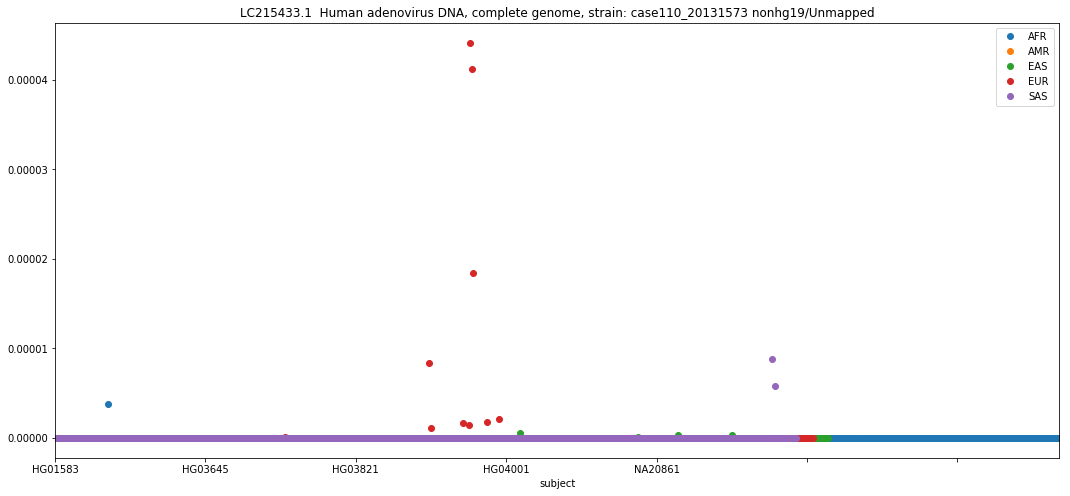

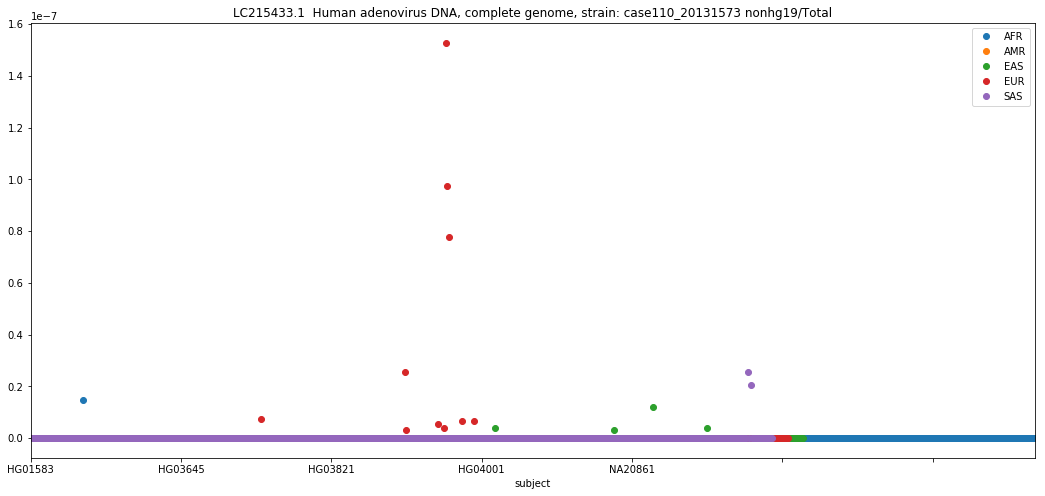

LC215434.1  Human adenovirus DNA, complete genome, strain: case111_20131575


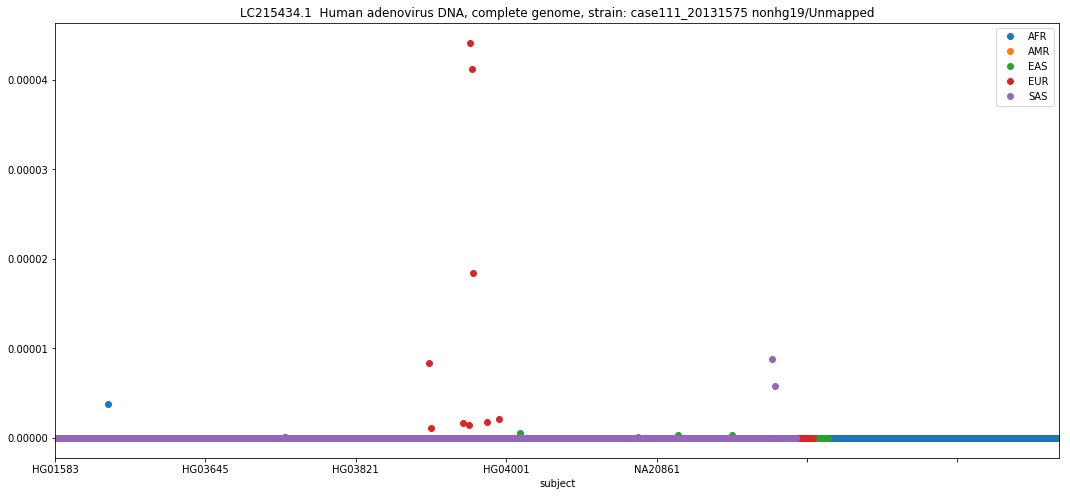

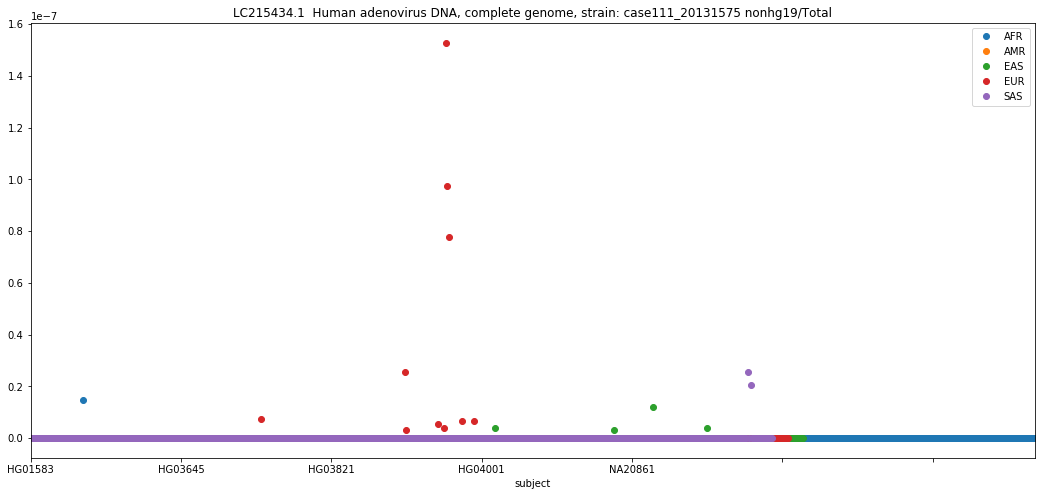

LC215435.1  Human adenovirus DNA, complete genome, strain: case112_20131578


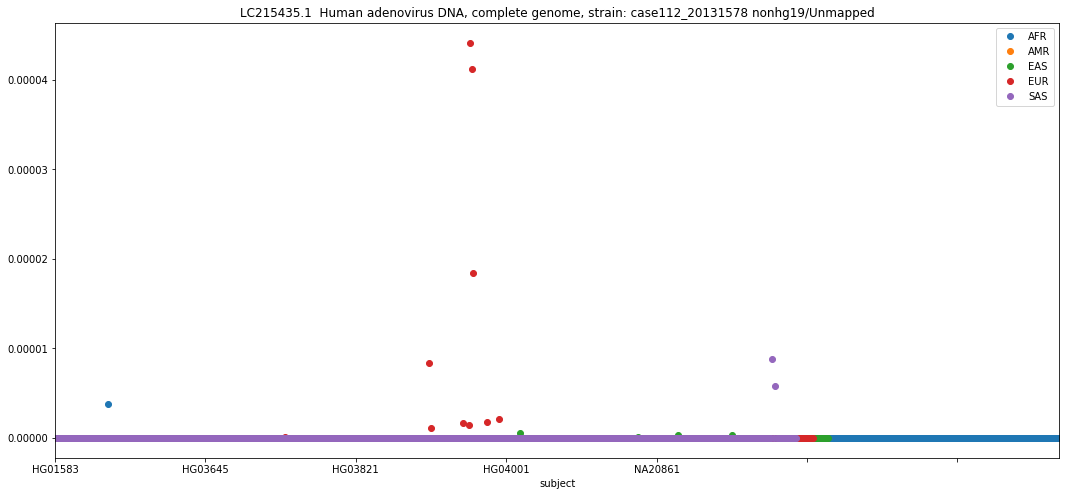

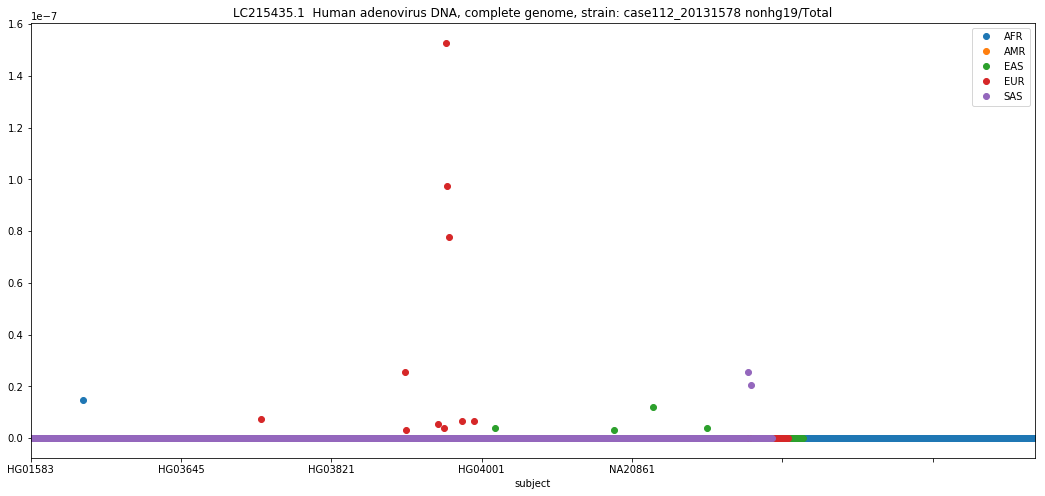

LC215436.1  Human adenovirus DNA, complete genome, strain: case113_20131581


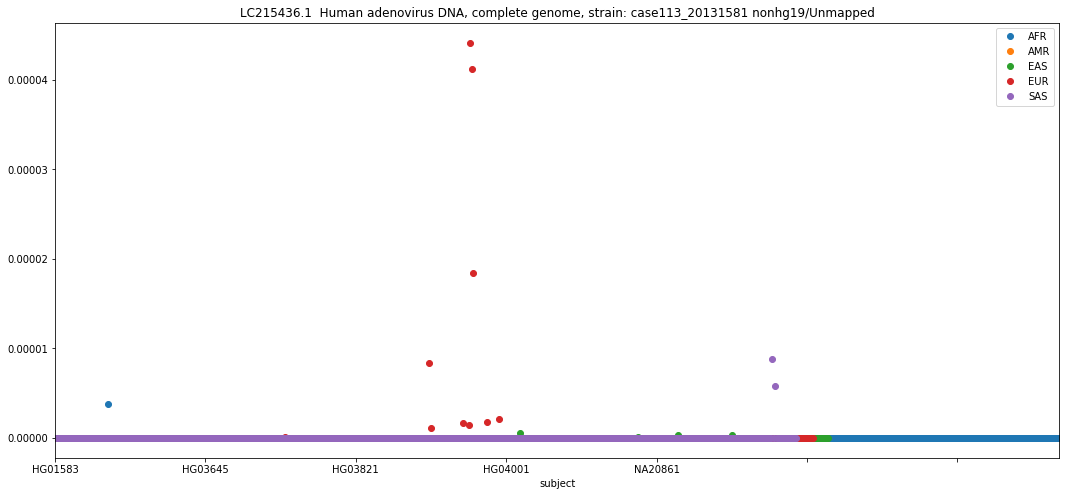

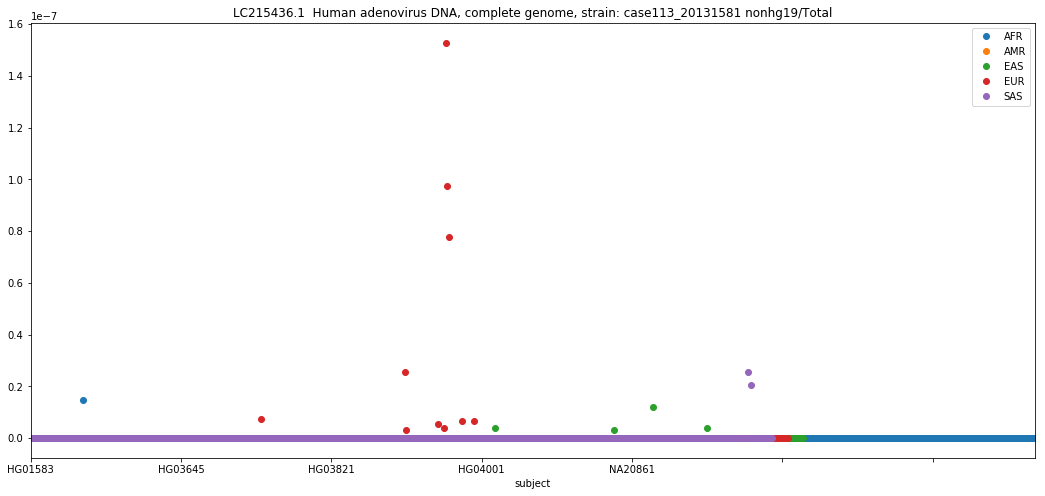

LC215437.1  Human adenovirus DNA, complete genome, strain: case118_20131587


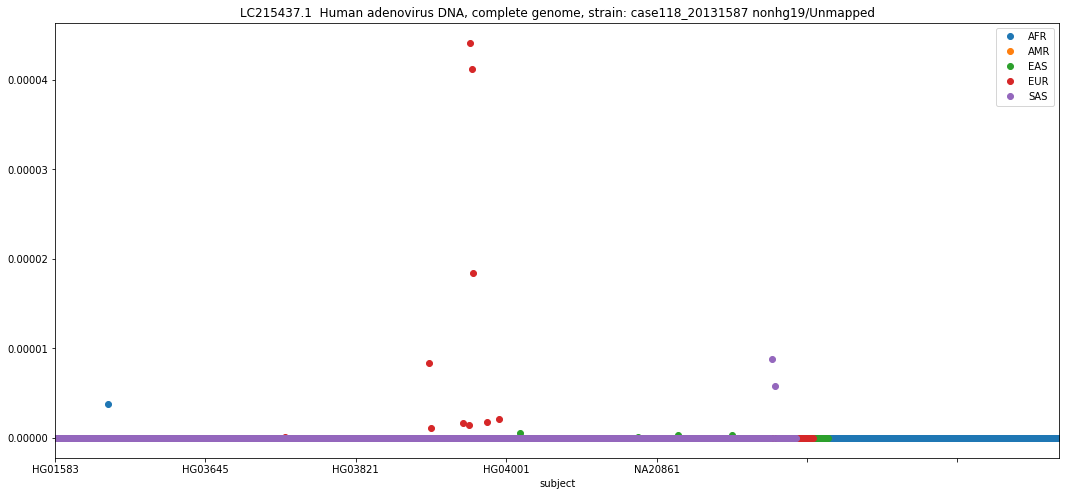

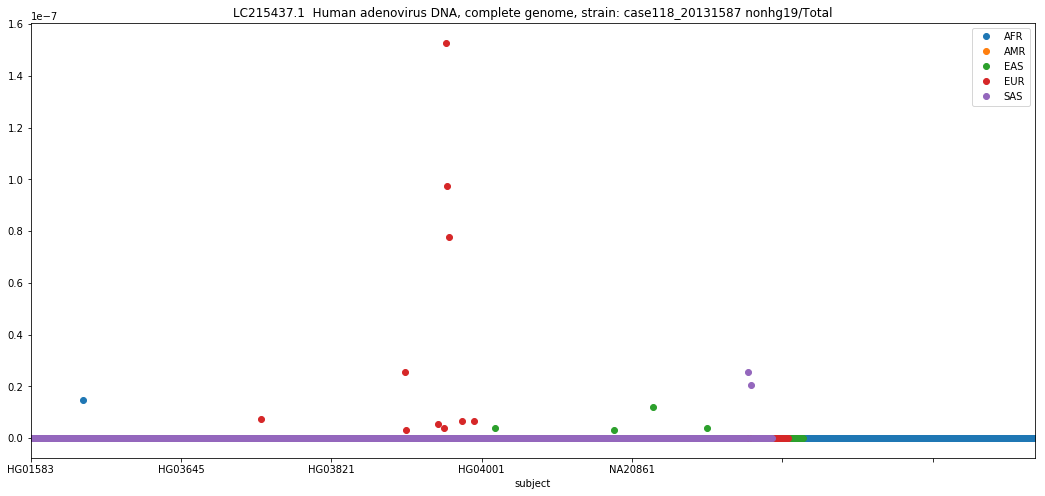

M17451.1  Human immunodeficiency virus type 1, isolate RF (HAT-3), complete genome


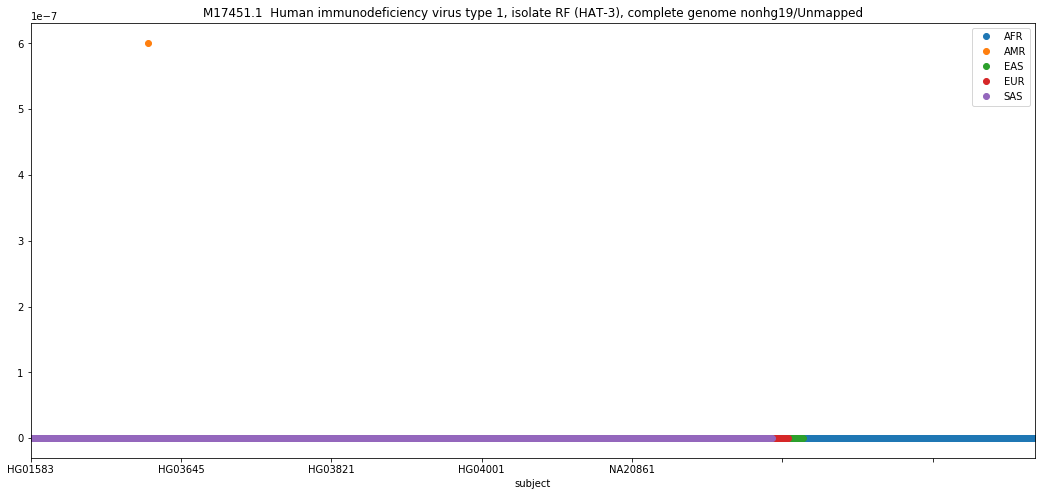

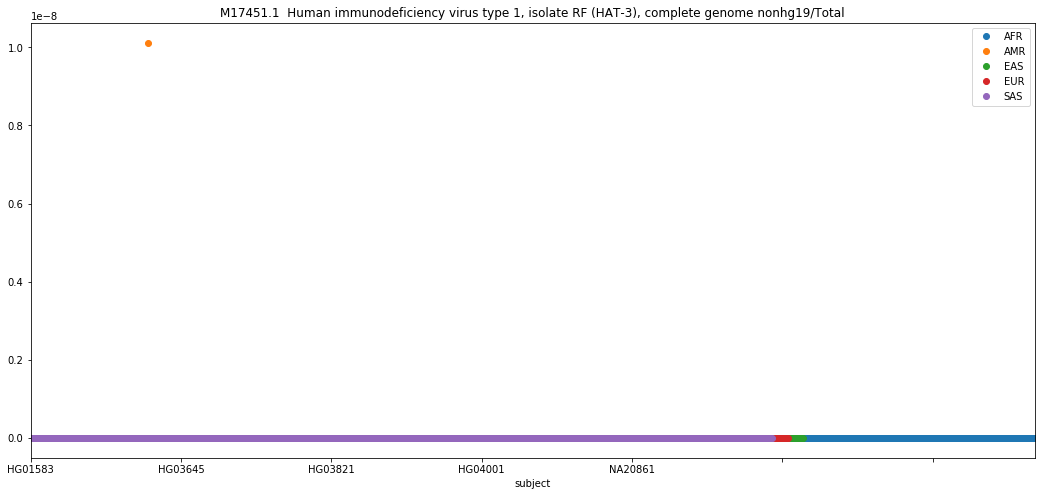

M26727.1  Human immunodeficiency virus type 1 (HIV-1) proviral DNA, complete genome


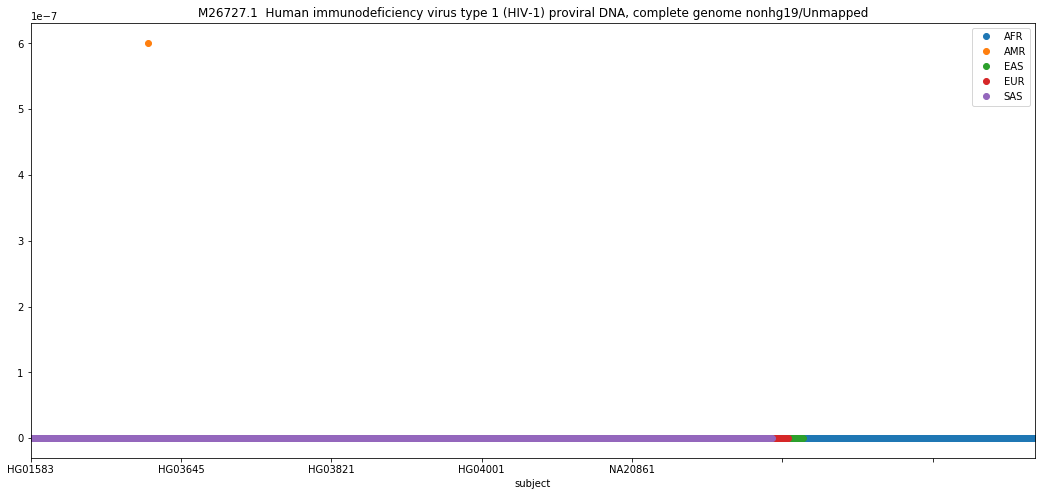

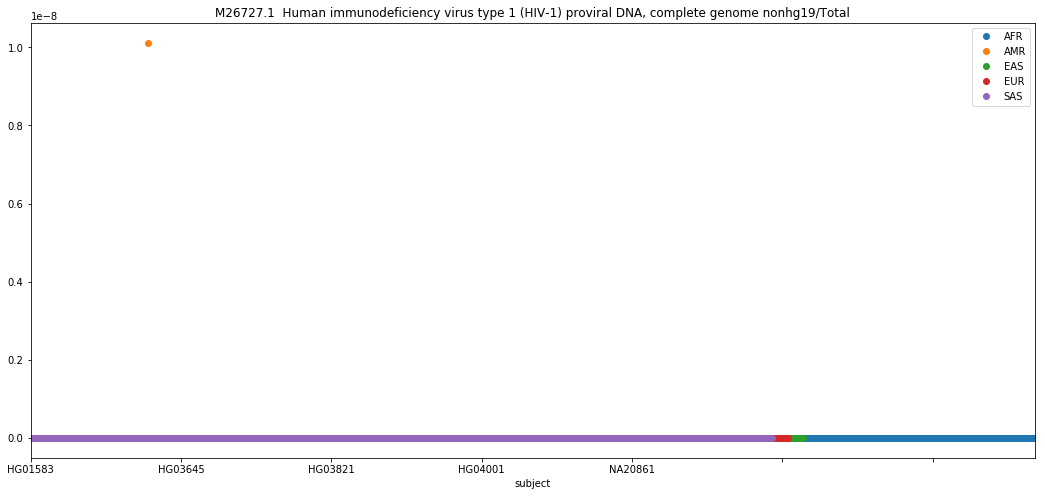

M27323.1  Human immunodeficiency virus type 1 (HIV-1) proviral complete genome


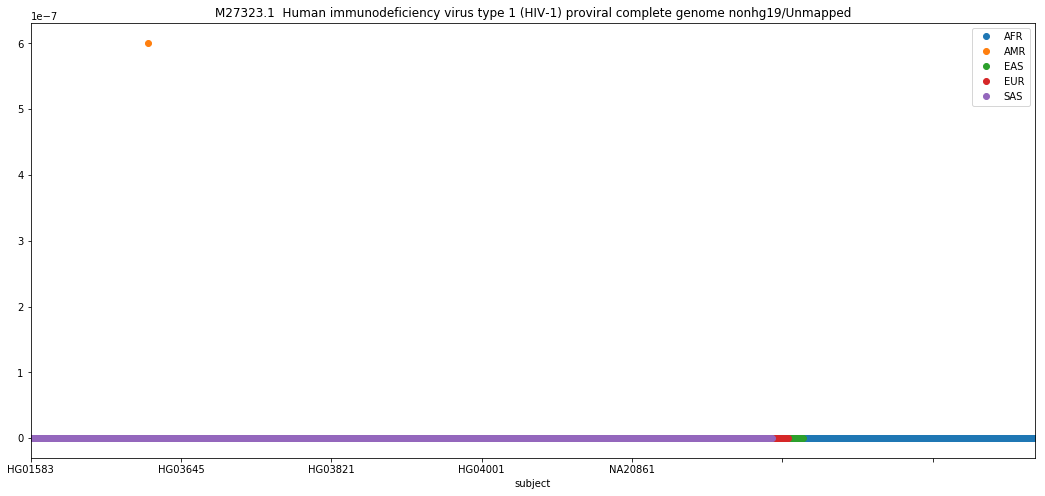

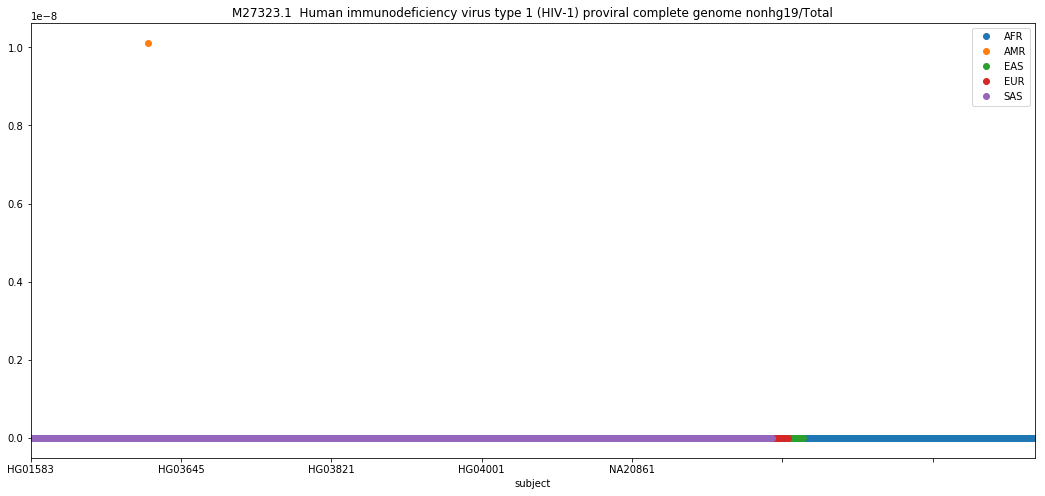

NC_000898.1  Human herpesvirus 6B, complete genome


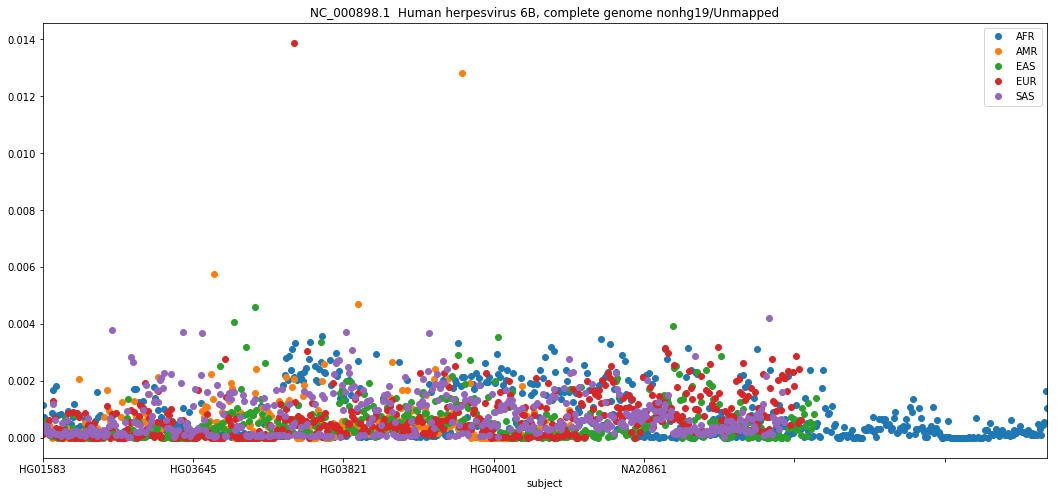

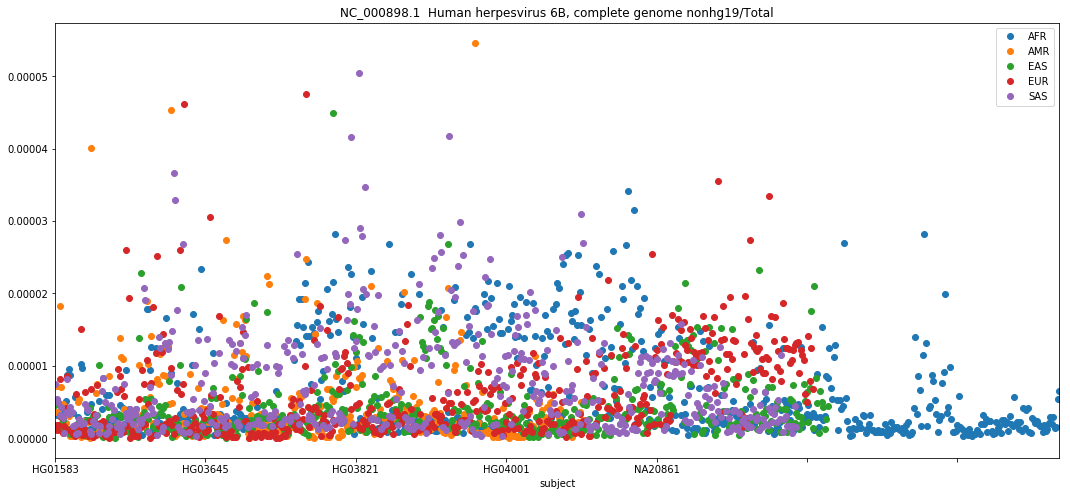

NC_001526.4  Human papillomavirus type 16, complete genome


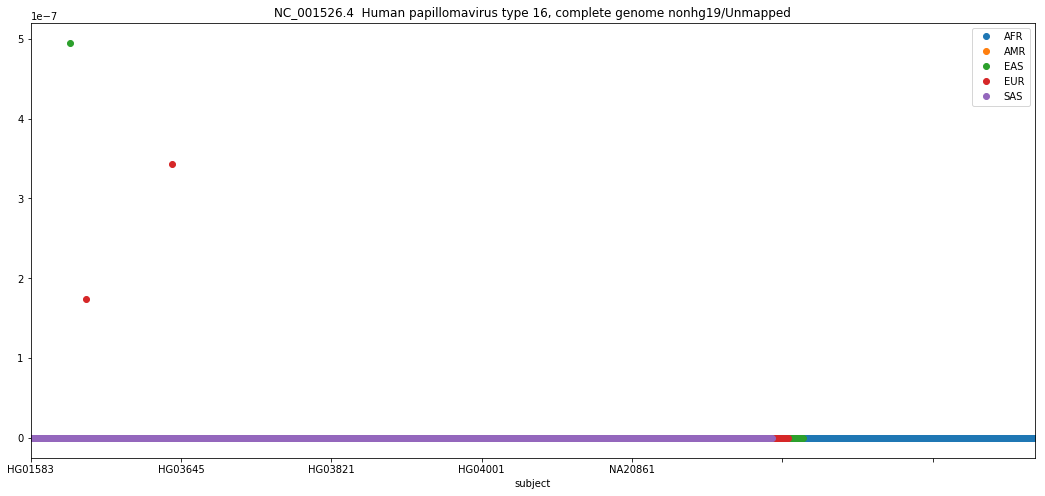

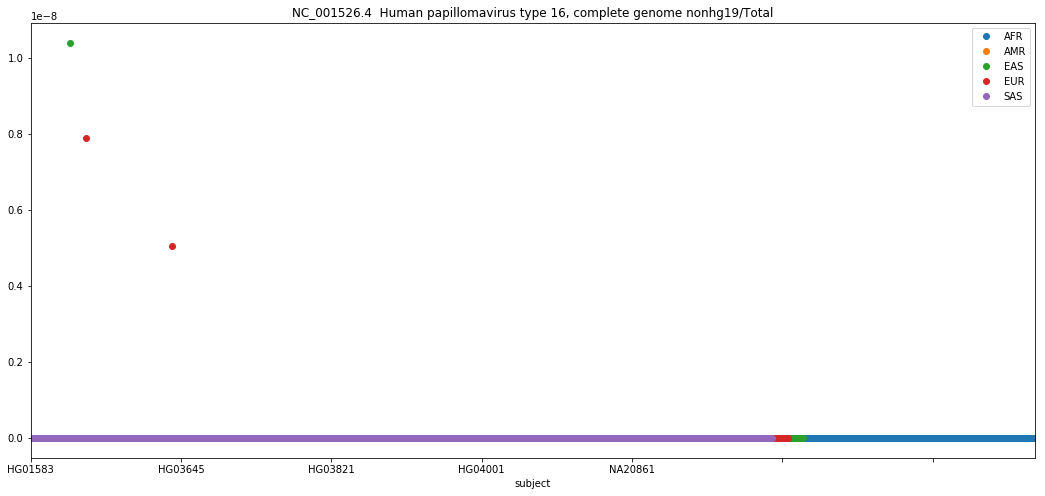

NC_001664.4  Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102


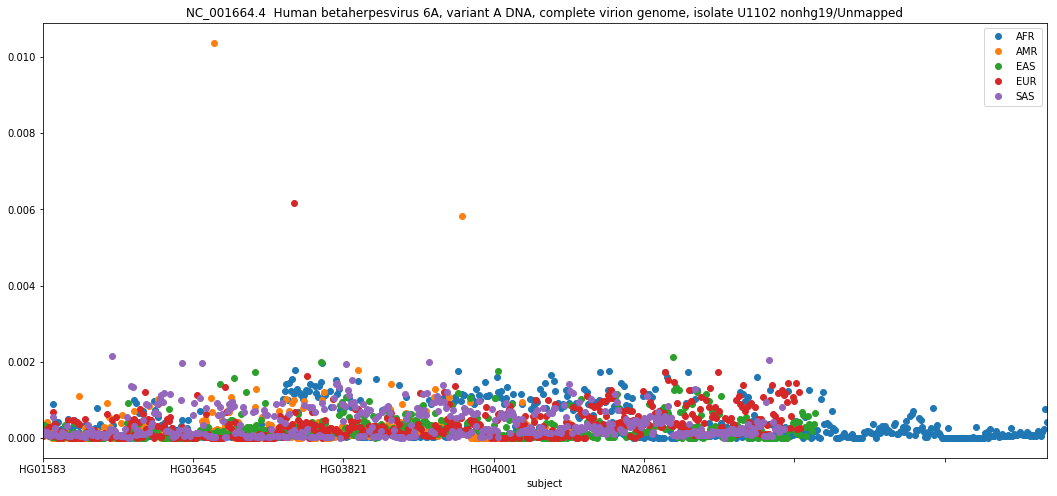

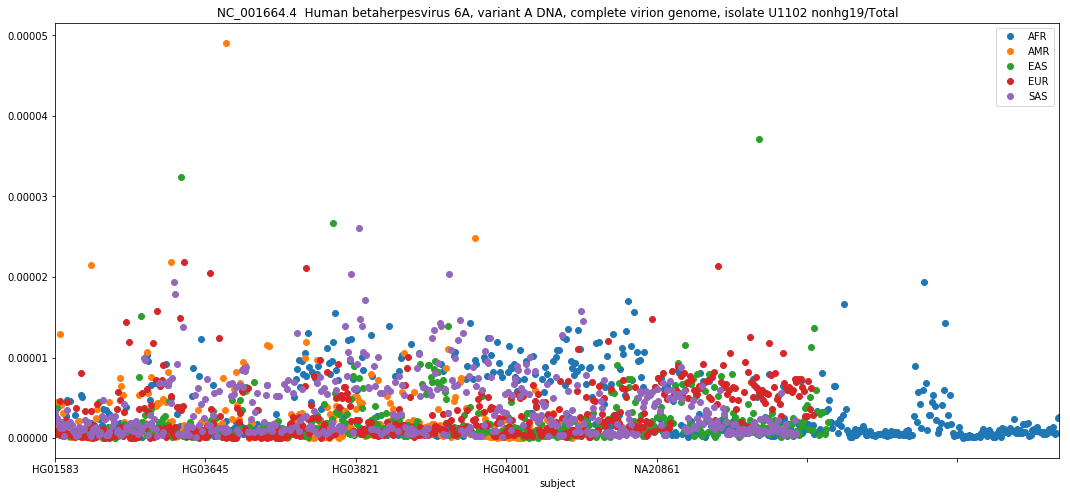

NC_001716.2  Human herpesvirus 7, complete genome


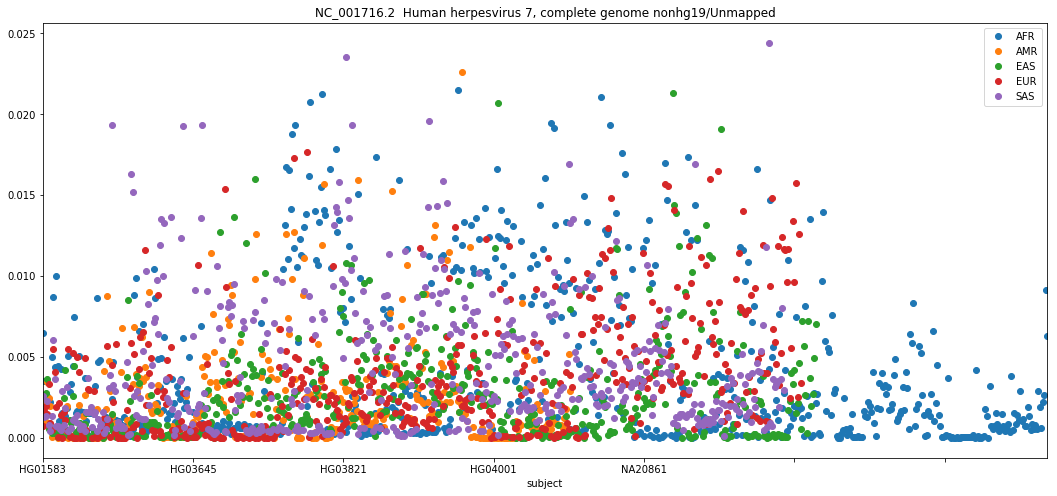

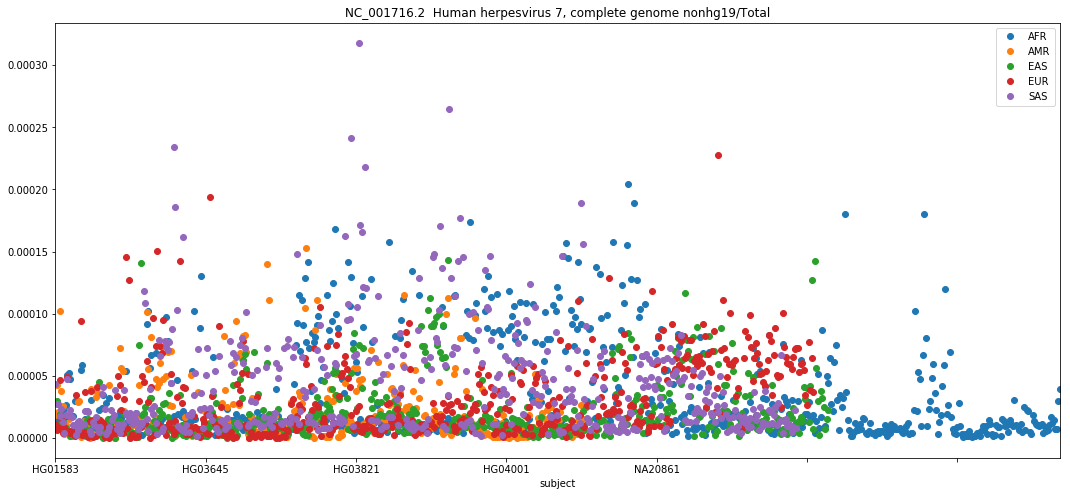

NC_006273.2  Human herpesvirus 5 strain Merlin, complete genome


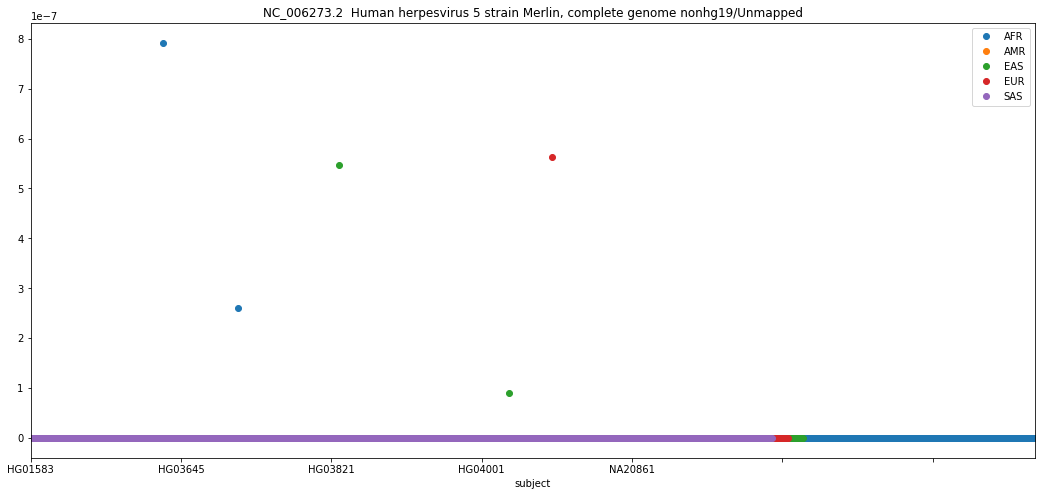

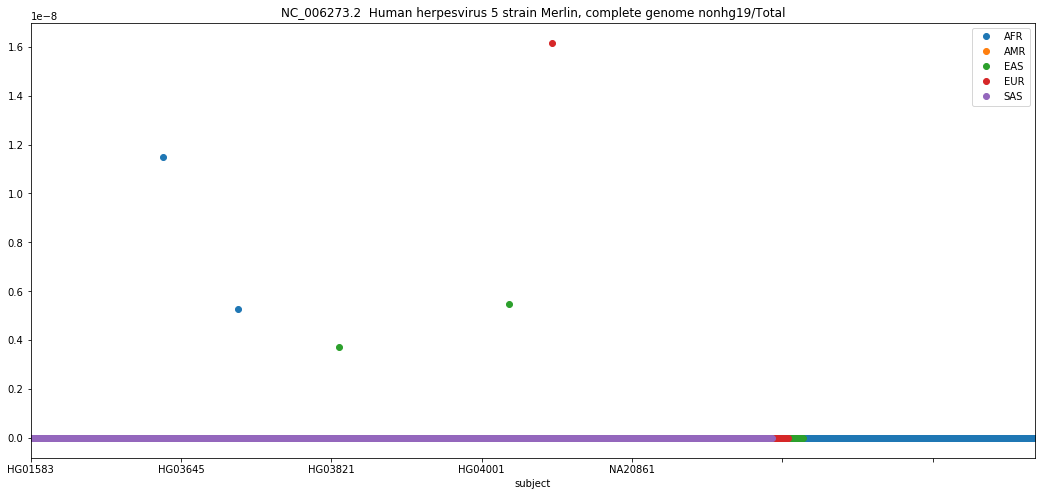

NC_007605.1  Human gammaherpesvirus 4, complete genome


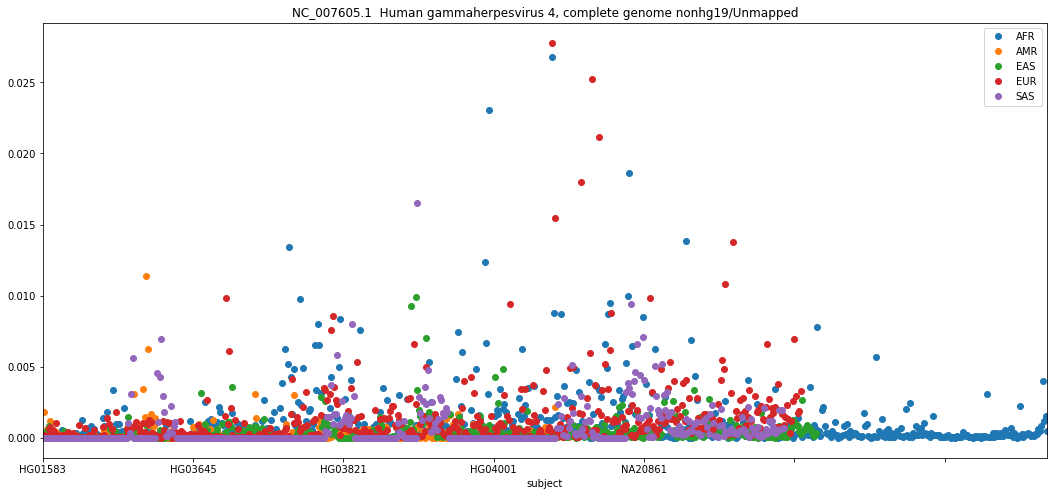

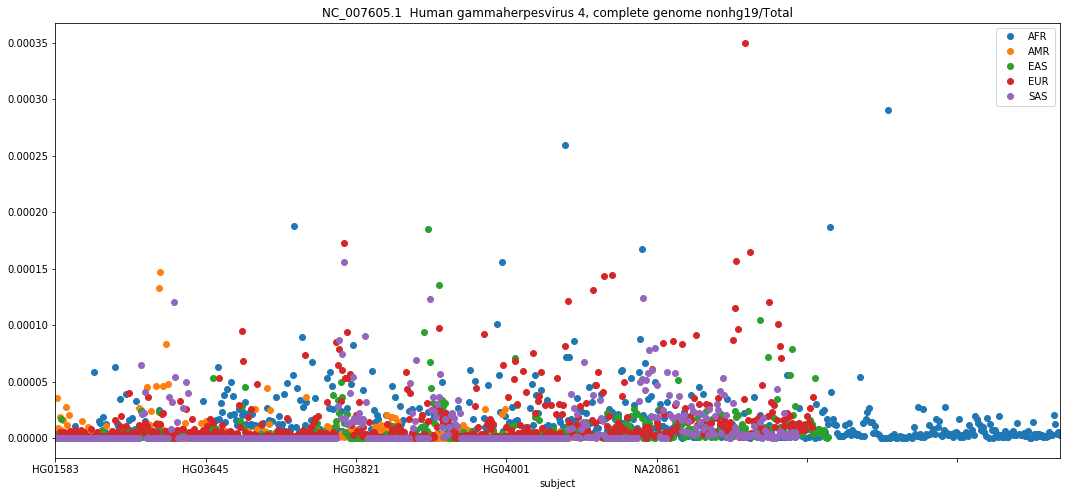

NC_008168.1  Choristoneura fumiferana granulovirus, complete genome


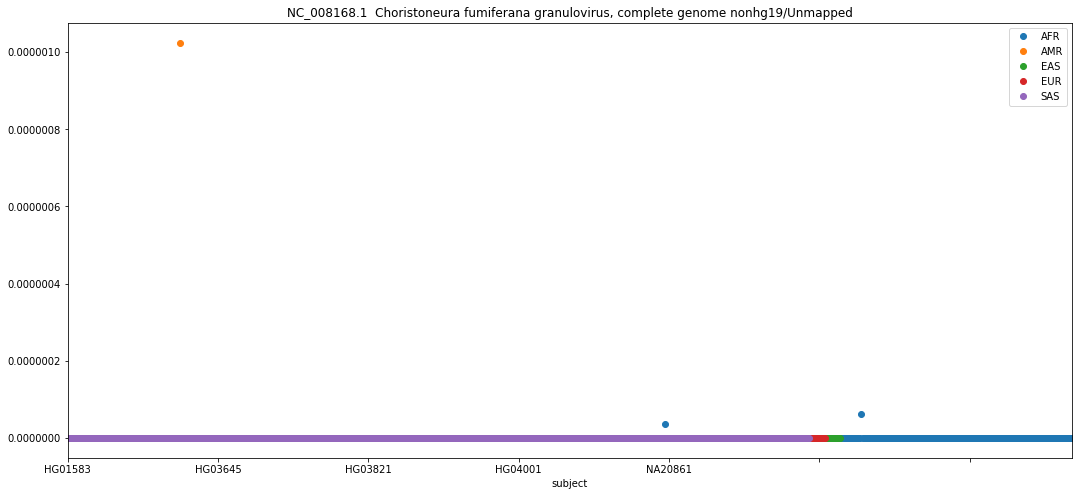

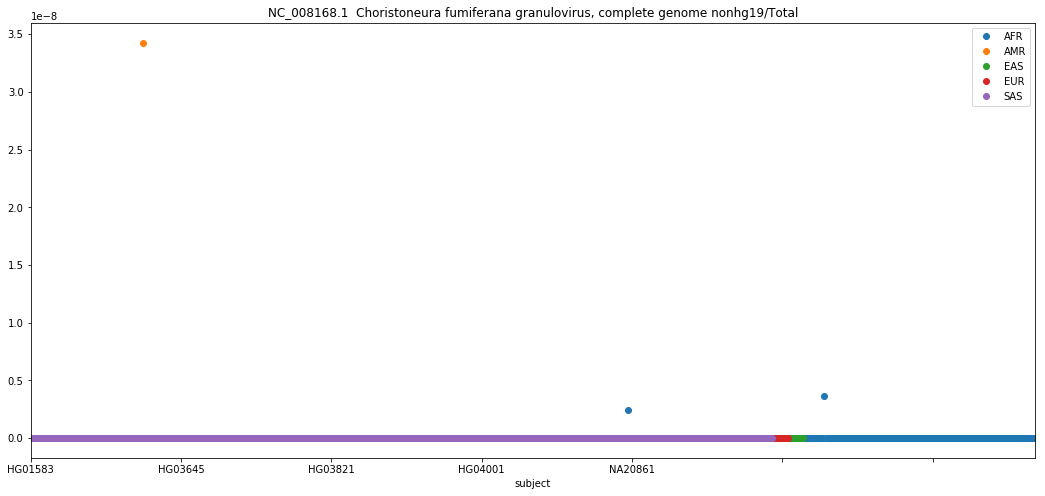

NC_009333.1  Human herpesvirus 8, complete genome


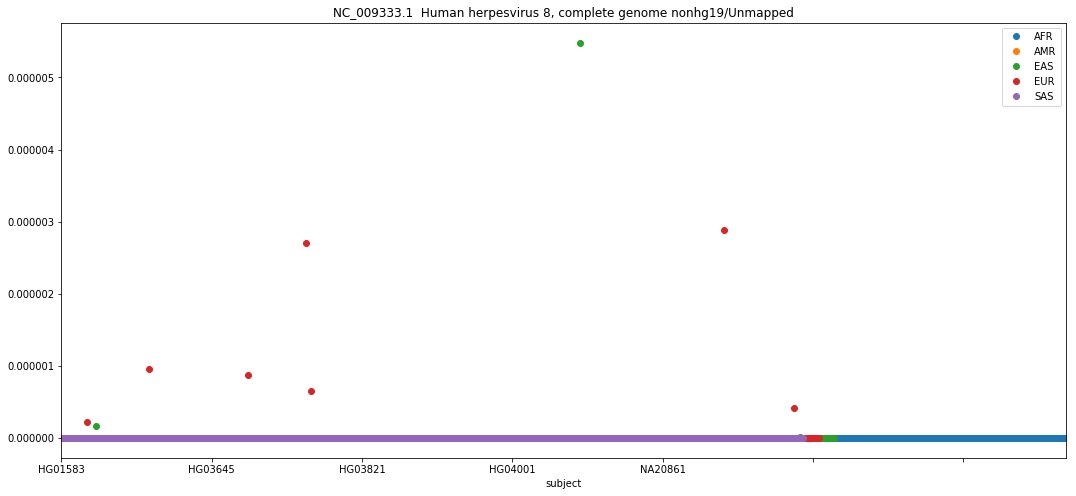

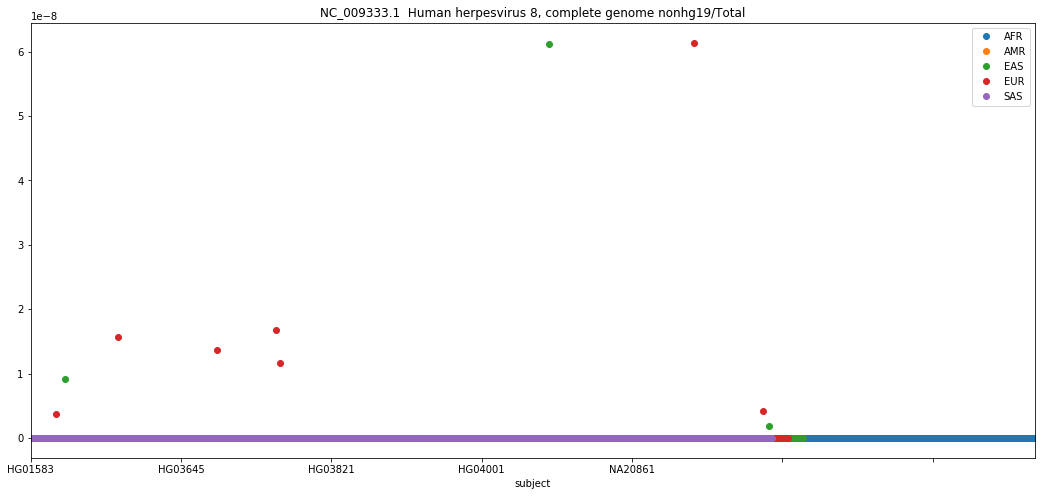

NC_012783.2  Cercopithecine herpesvirus 5 strain 2715, complete genome


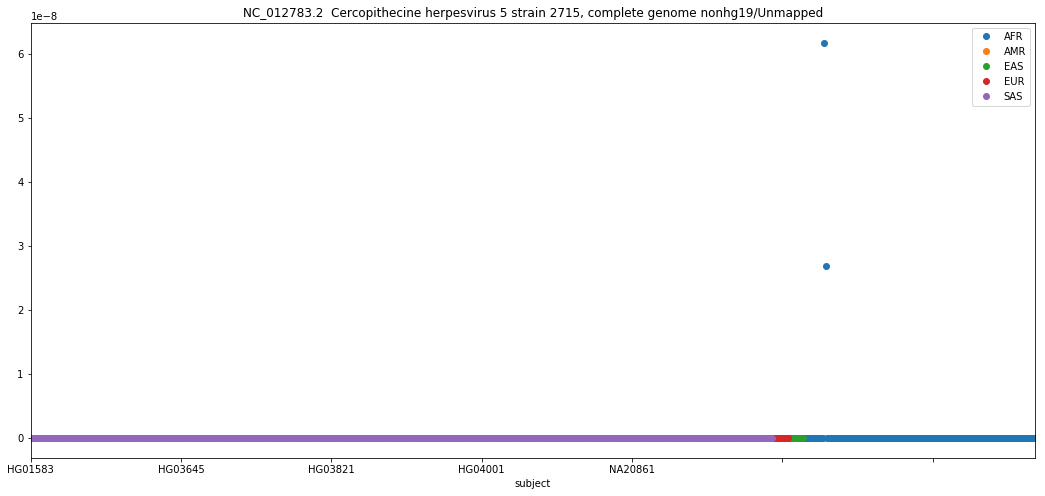

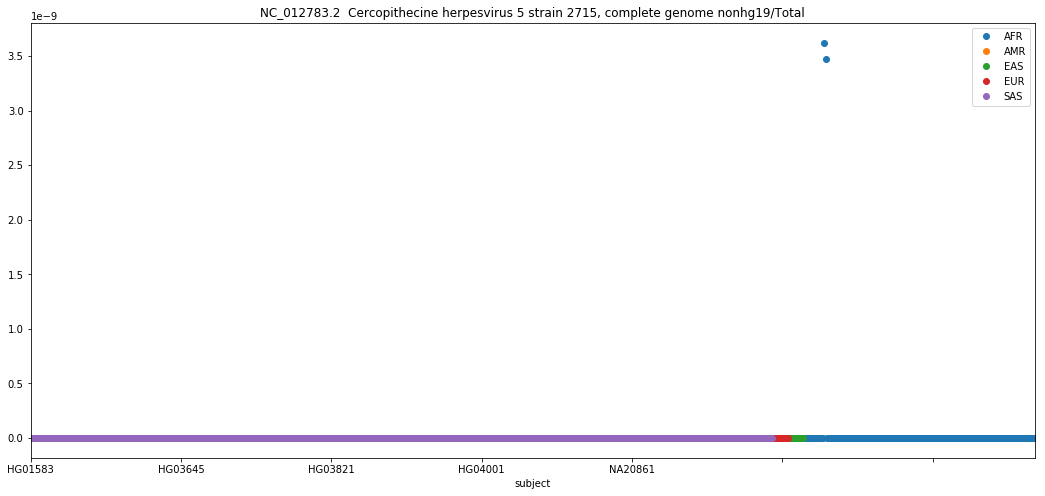

NC_016447.1  Aotine herpesvirus 1 strain S34E, complete genome


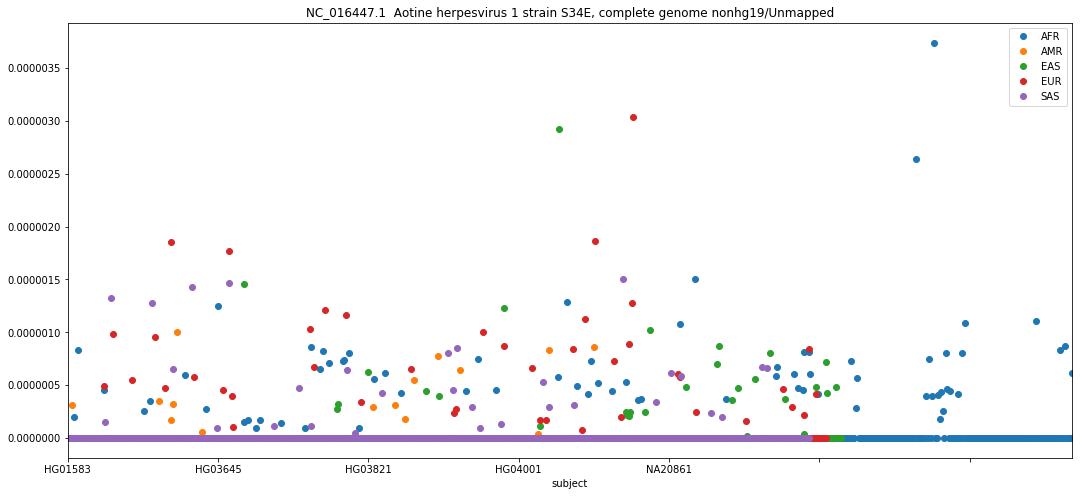

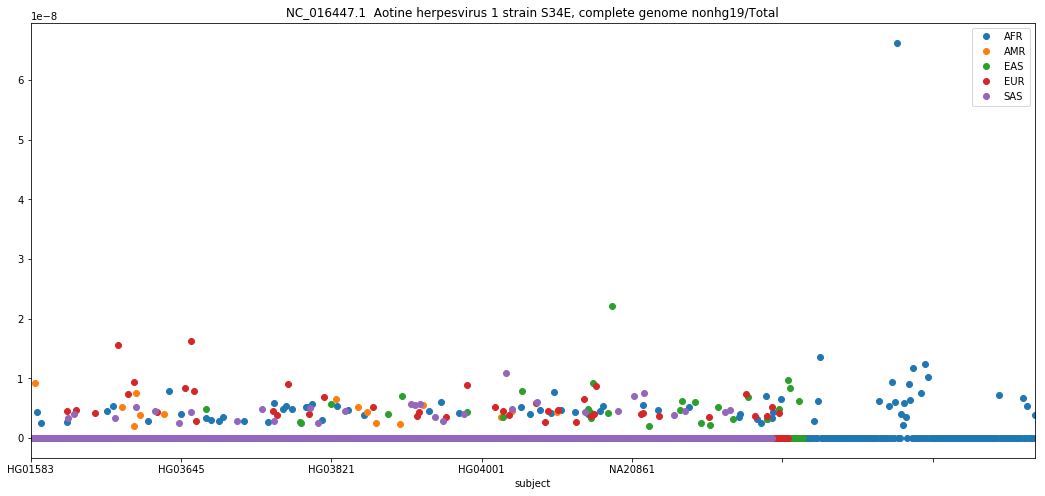

NC_016448.1  Saimiriine herpesvirus 4 strain SqSHV, complete genome


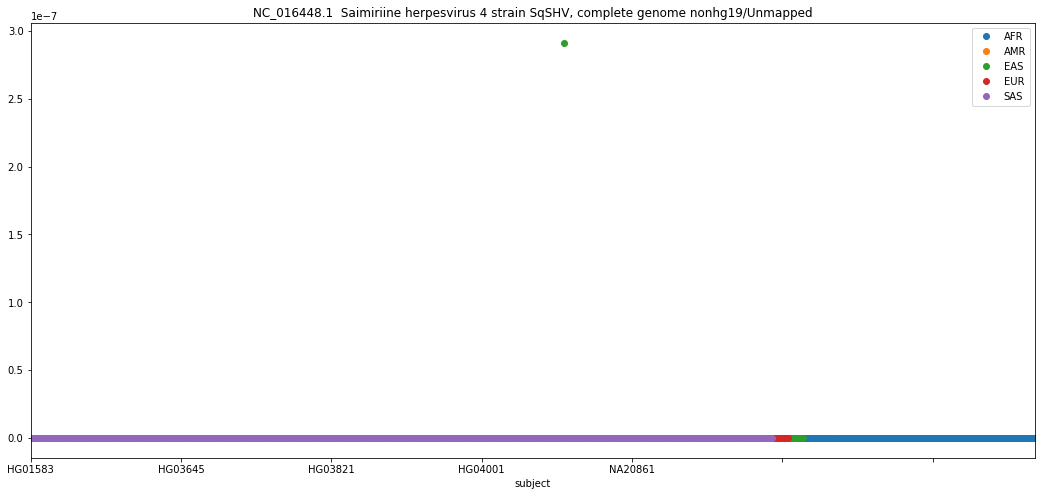

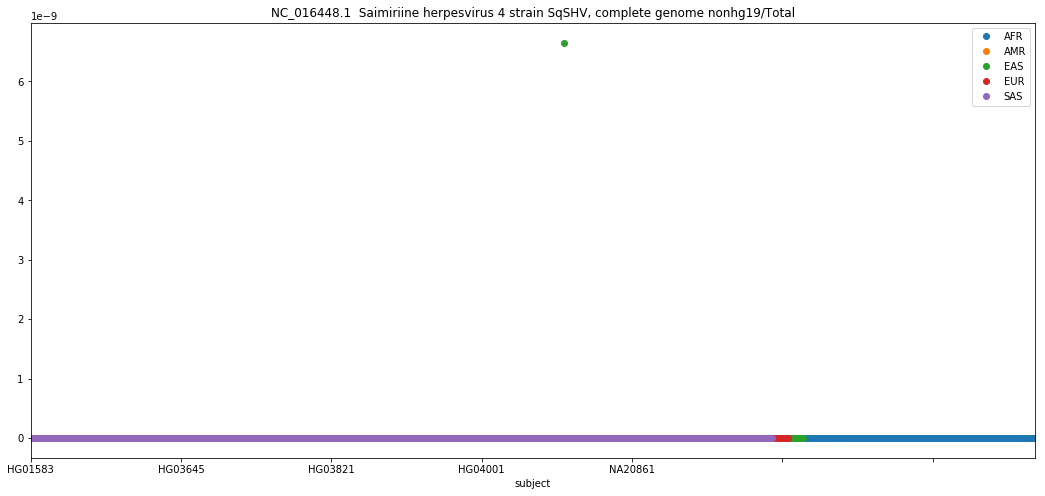

U43400.1  Human herpesvirus-7 (HHV7) JI, complete virion genome


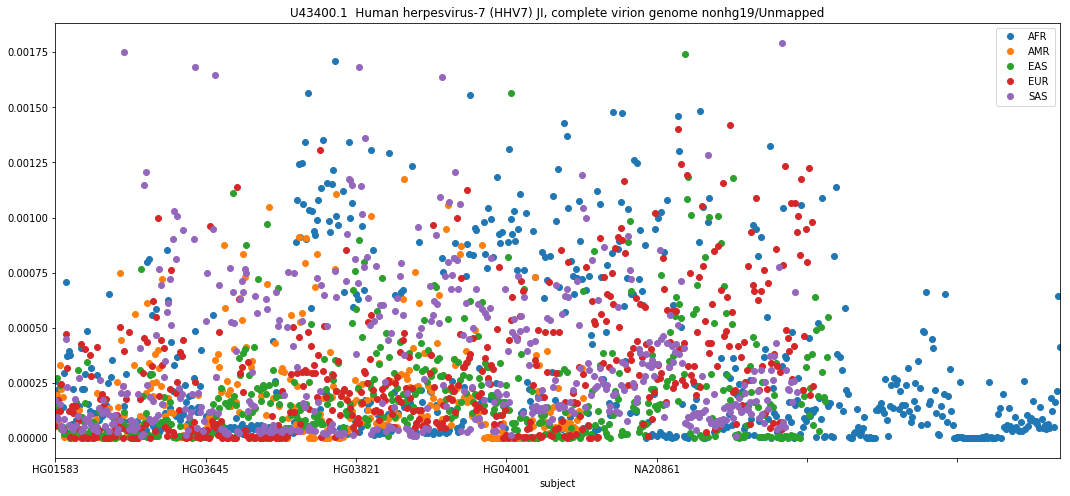

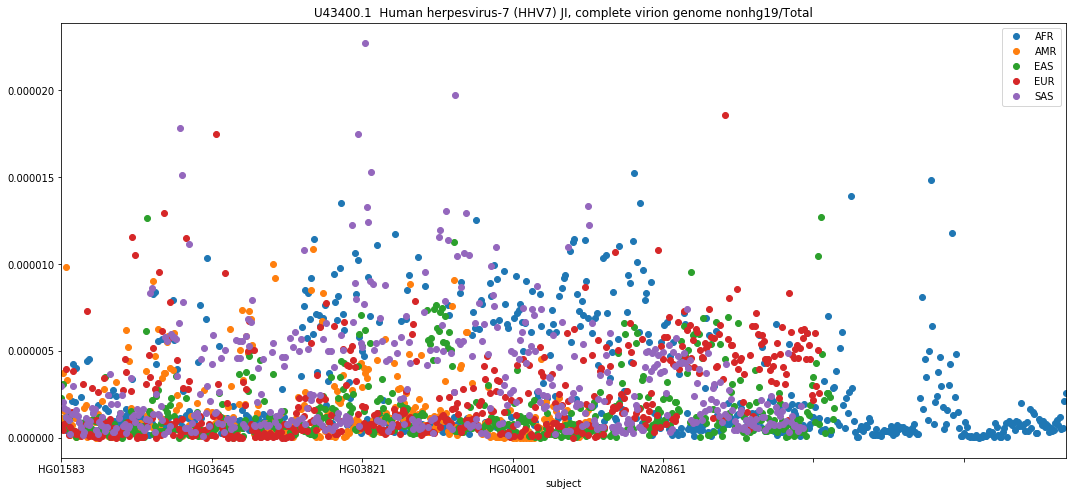

U46016.1  Human immunodeficiency virus type 1 subtype C complete proviral genome


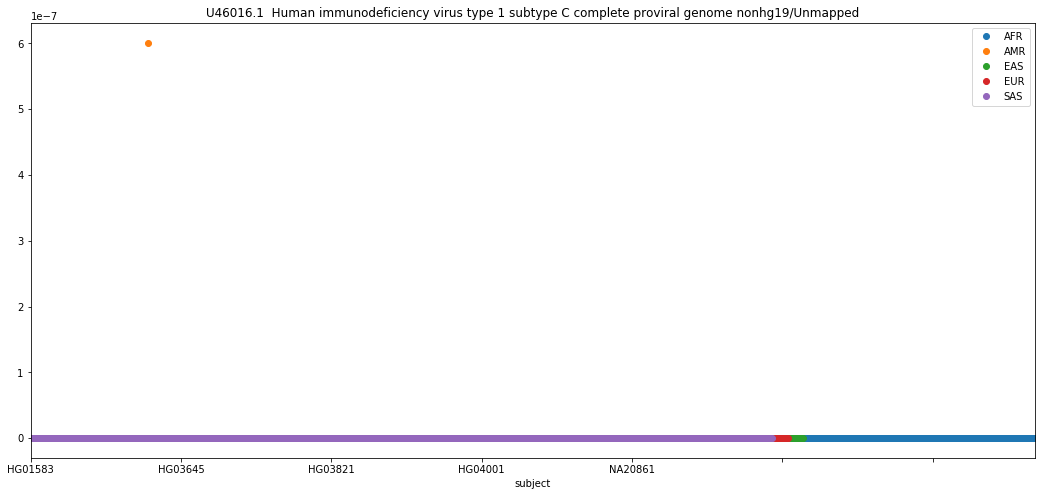

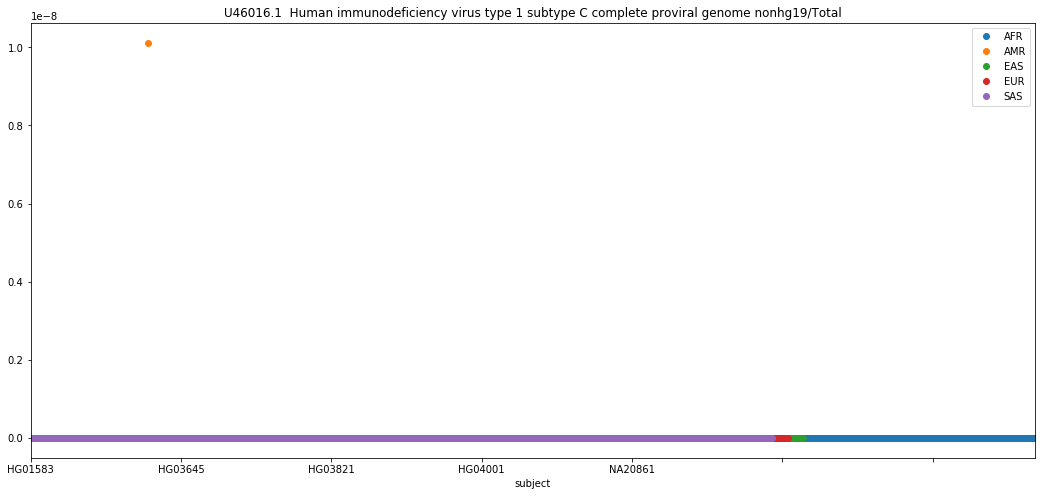

U54771.1  Human immunodeficiency virus type 1, strain CM240, complete proviral genome


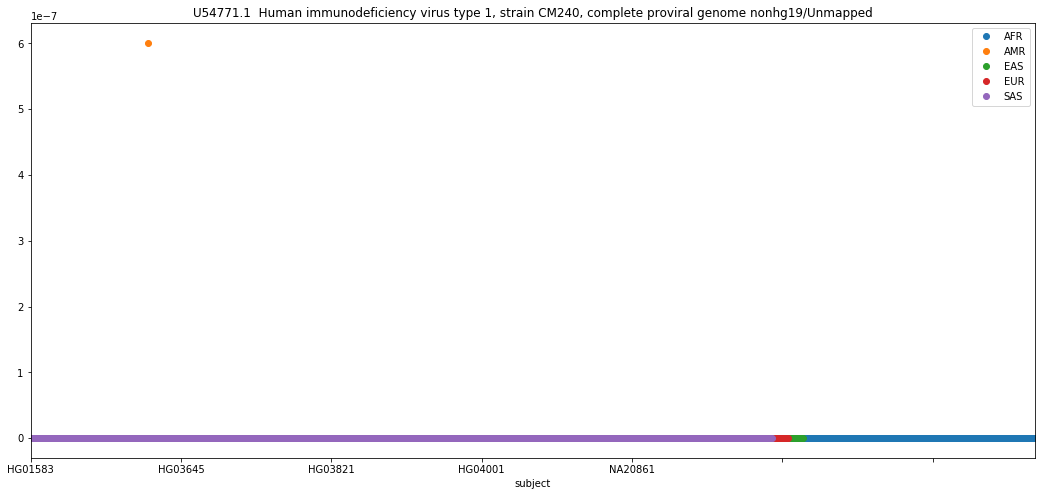

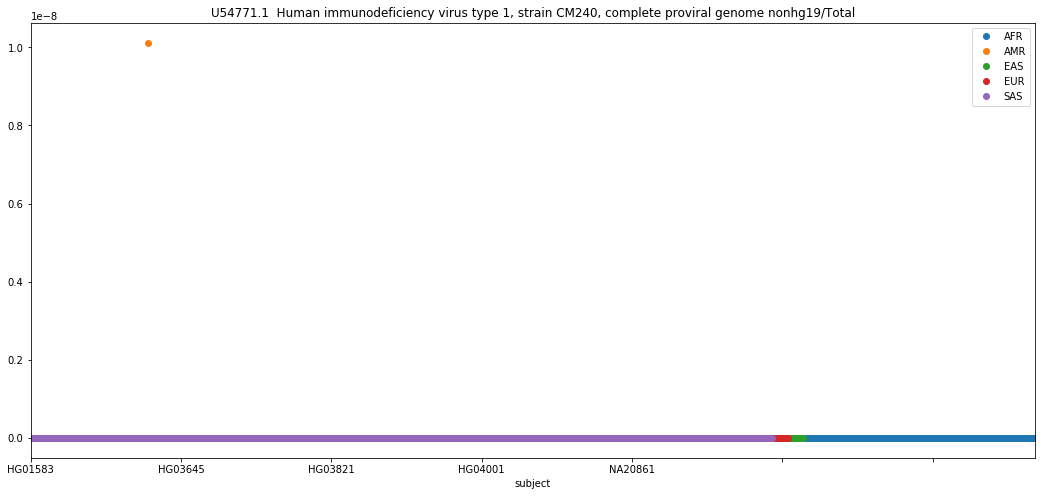

X14112.1  Human herpesvirus 1 complete genome


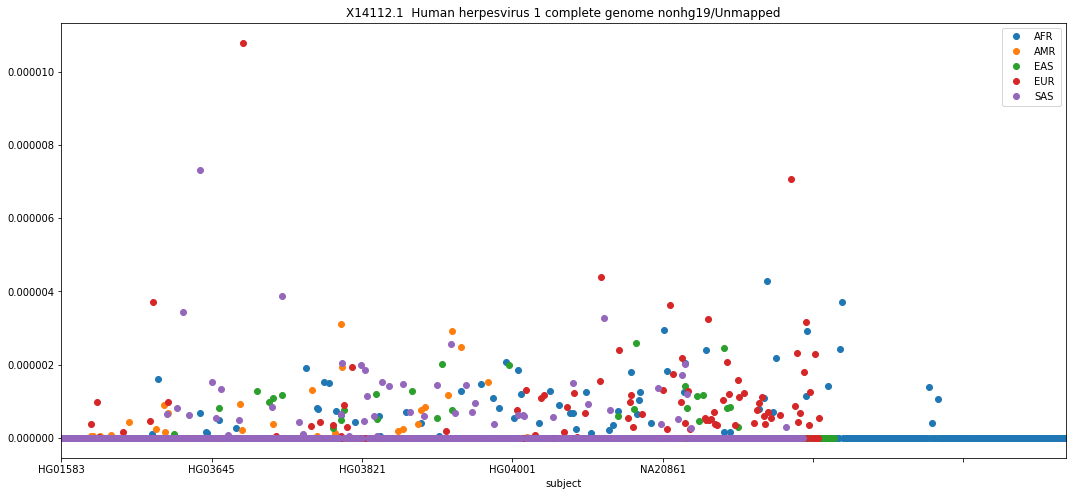

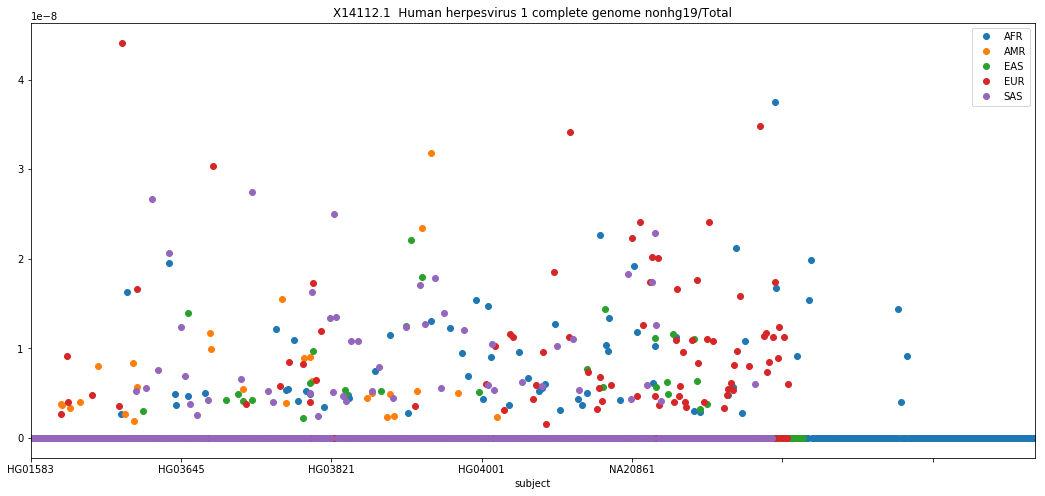

X17403.1  Human cytomegalovirus strain AD169 complete genome


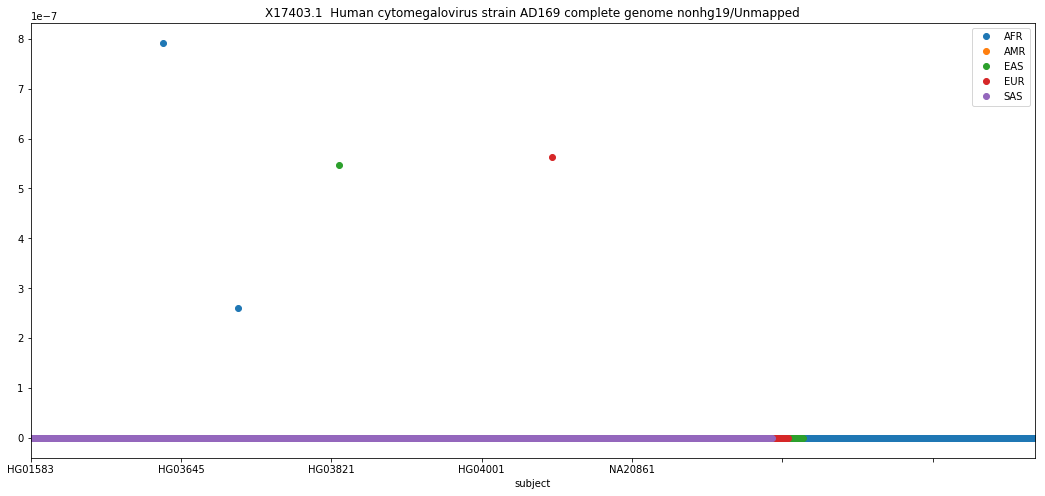

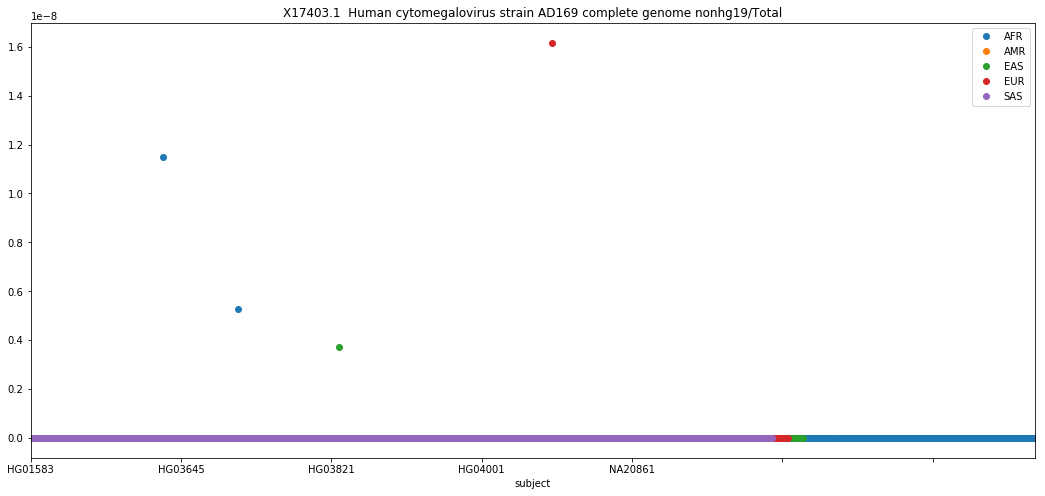

X75658.1  Human hepatitis virus (genotype F, Fou) preS1, preS2, S, C, X, antigens, core antigen, X protein and polymerase


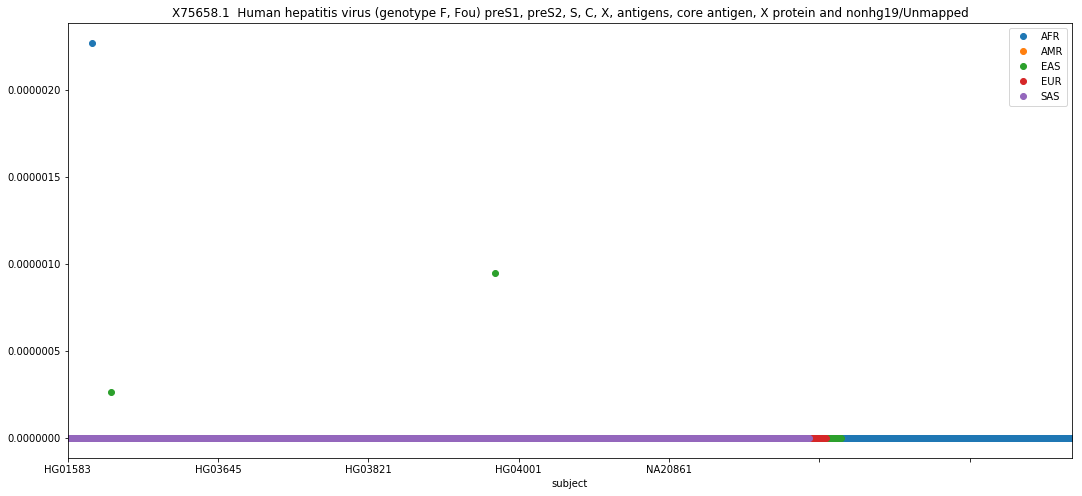

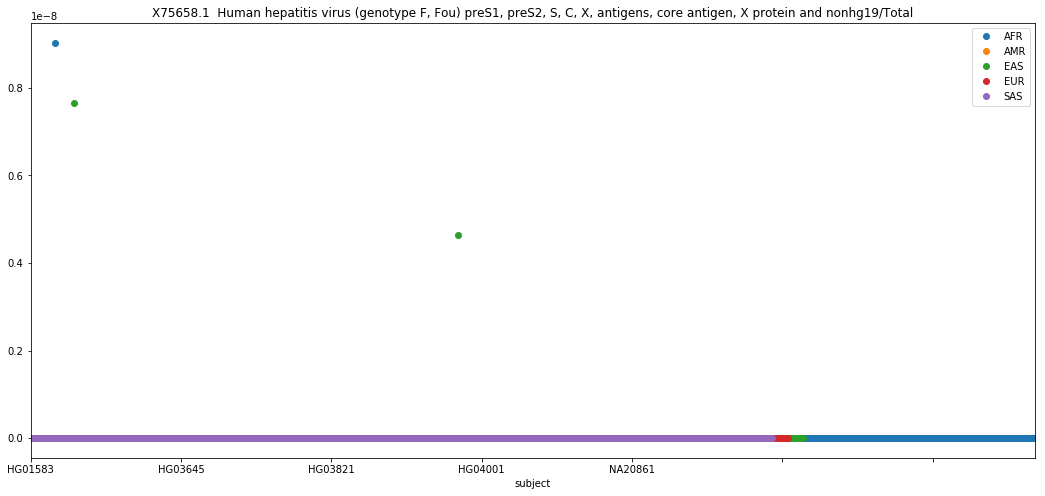

X83413.2  Human betaherpesvirus 6A, variant A DNA, complete virion genome, isolate U1102


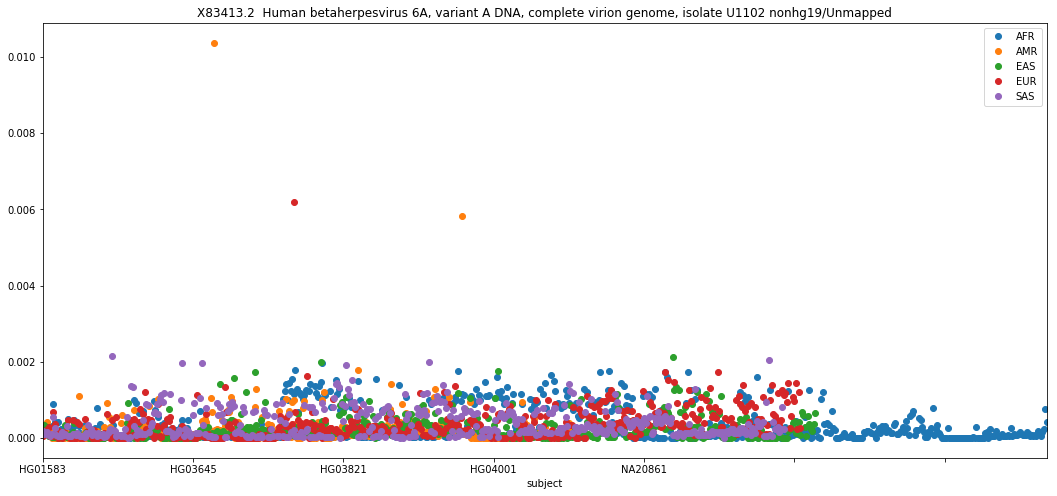

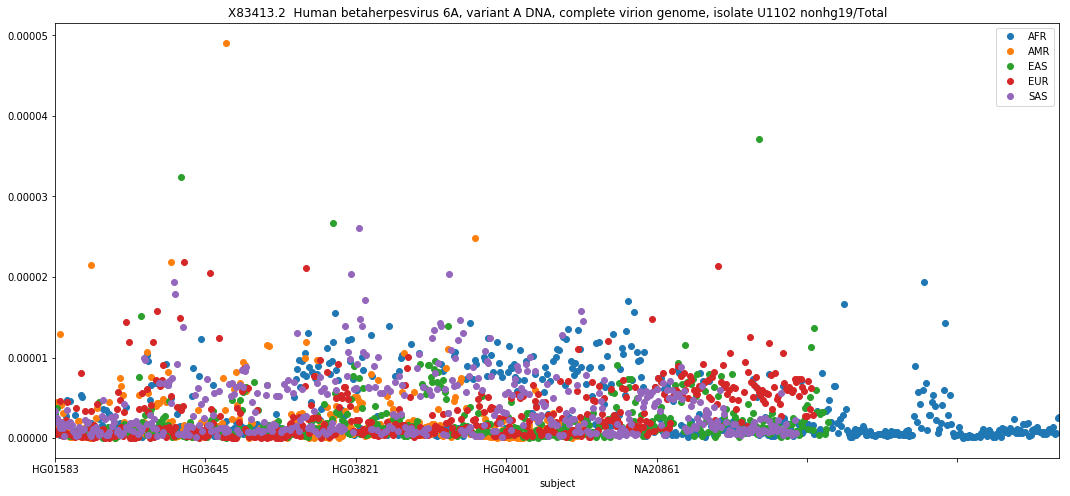

Z86099.2  Herpes simplex virus type 2 (strain HG52), complete genome


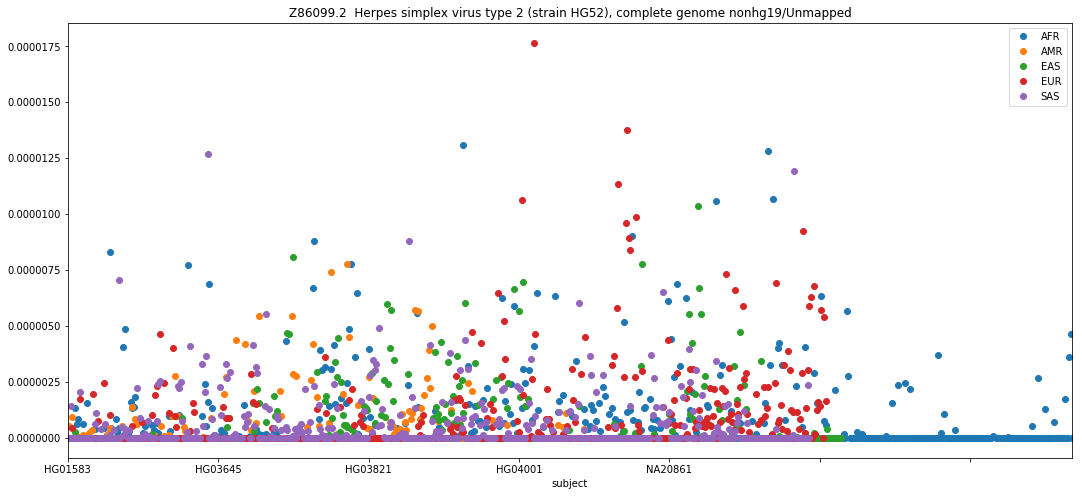

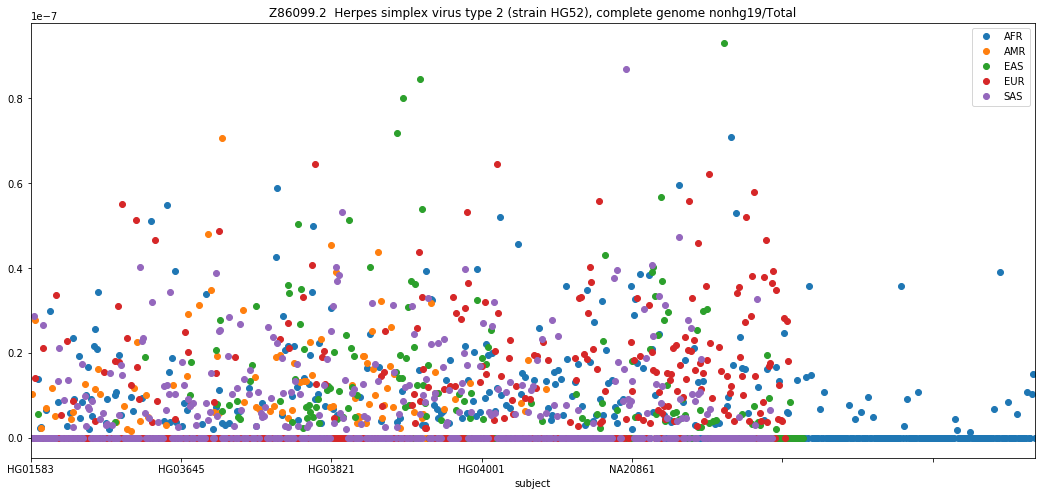

In [10]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['nonhg19_'+tmp+'_unmapped'].max() > 0 ):  
        title=accession + "  " + row['description']
        print(title)
        #df.plot( title=title[:110],marker='o',linewidth=0,
        #            logy=False,x='subject',y='nonhg19_'+tmp+'_unmapped')

        fig, ax = plt.subplots()
        for name, group in df.groupby('Super Population Code'):
            group.plot(title=title[:110] + " nonhg19/Unmapped", x='subject', y='nonhg19_'+tmp+'_unmapped',
            ax=ax, label=name, marker='o',linewidth=0)
        plt.legend()
        #fig, ax = plt.subplots()
        #for name, group in df.groupby('Gender'):
        #    group.plot(x='subject', y='nonhg19_'+tmp+'_unmapped', ax=ax, label=name, marker='o',linewidth=0)
        #plt.legend()

        #df.plot( title=title[:110],marker='o',linewidth=0,
        #            logy=False,x='subject',y='nonhg19_'+tmp+'_total')

        fig, ax = plt.subplots()
        for name, group in df.groupby('Super Population Code'):
            group.plot(title=title[:110] + " nonhg19/Total", x='subject', y='nonhg19_'+tmp+'_total',
            ax=ax, label=name, marker='o',linewidth=0)
        plt.legend()
        #fig, ax = plt.subplots()
        #for name, group in df.groupby('Gender'):
        #    group.plot(x='subject', y='nonhg19_'+tmp+'_total', ax=ax, label=name, marker='o',linewidth=0)
        #plt.legend()

        plt.show()


In [11]:
for accession, row in virii.iterrows():
    tmp=accession.replace(".", "_")
    if( df['nonhg19_'+tmp+'_unmapped'].max() > 0 ):
        mean=df['nonhg19_'+tmp+'_unmapped'].mean()
        std=df['nonhg19_'+tmp+'_unmapped'].std()
        print(accession + "  " + row['description'] + "\nmean " + str(mean) + "\tstddev " + str(std))
        s=df[ df['nonhg19_'+tmp+'_unmapped'] > ( mean + std )]
        print(">mean+stddev : " + str(len(s)))
        print(", ".join(s['subject'].tolist()))
        s=df[ df['nonhg19_'+tmp+'_unmapped'] > ( mean + 2 * std )]
        print(">mean+2*stddev : " + str(len(s)))
        print(", ".join(s['subject'].tolist()))
        print()
        print()

AB513134.1  Human T-lymphotropic virus 1 proviral DNA, complete genome, isolate: B1033-2009
mean 3.128350415303301e-07	stddev 1.3462169772396192e-05
>mean+stddev : 5
HG01357, HG01917, HG01918, HG02675, HG03370
>mean+2*stddev : 3
HG01357, HG01918, HG03370


AB618031.1  Herpes simplex virus (type 1 /strain RH2) DNA, nearly complete genome
mean 1.1509151777741237e-05	stddev 0.0002684338994022313
>mean+stddev : 6
NA19660, NA19661, NA19678, NA19684, NA19685, NA19720
>mean+2*stddev : 6
NA19660, NA19661, NA19678, NA19684, NA19685, NA19720


AF037218.1  Human herpesvirus 7 strain RK, complete genome
mean 0.003564421510482036	stddev 0.004049854123088033
>mean+stddev : 378
HG00186, HG00235, HG00265, HG00288, HG00290, HG00362, HG00373, HG00595, HG00982, HG01088, HG01139, HG01272, HG01275, HG01323, HG01325, HG01362, HG01363, HG01405, HG01431, HG01432, HG01443, HG01444, HG01485, HG01486, HG01509, HG01599, HG01700, HG01767, HG01771, HG01777, HG01800, HG01807, HG01815, HG01890, HG01896, HG01921, HG01

NC_009333.1  Human herpesvirus 8, complete genome
mean 5.673930473696702e-09	stddev 1.376238141529767e-07
>mean+stddev : 9
HG00115, HG00174, HG00306, HG00357, HG00361, HG00464, NA18570, NA20586, NA20806
>mean+2*stddev : 7
HG00174, HG00306, HG00357, HG00361, NA18570, NA20586, NA20806


NC_012783.2  Cercopithecine herpesvirus 5 strain 2715, complete genome
mean 3.4972954177803354e-11	stddev 1.3375946041946885e-09
>mean+stddev : 2
NA19315, NA19316
>mean+2*stddev : 2
NA19315, NA19316


NC_016447.1  Aotine herpesvirus 1 strain S34E, complete genome
mean 4.62428574552581e-08	stddev 2.1661766219389064e-07
>mean+stddev : 147
HG00122, HG00128, HG00143, HG00174, HG00182, HG00187, HG00243, HG00265, HG00269, HG00272, HG00355, HG00358, HG00367, HG00384, HG00637, HG00978, HG01121, HG01137, HG01142, HG01512, HG01577, HG01626, HG01710, HG01781, HG01870, HG01871, HG01890, HG01936, HG01954, HG01992, HG02014, HG02047, HG02139, HG02156, HG02230, HG02253, HG02339, HG02392, HG02484, HG02546, HG02568, HG0269

Sadly, there is still a bit of noise so it needs a bit of fine tuning.

In [12]:
import datetime
print(str(datetime.datetime.now()))

2019-02-04 12:56:10.123092
